In [23]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [93]:
data=pd.read_csv('net_results_fashionmnist_full.csv')

In [94]:
def preprocess(data):
    result=data.copy()
    for i in range(1,16):
        if(1<=i<=5):
            result=result.rename(columns=lambda x: re.sub('net'+str(i)+' ',str(i)+'W',x))
        elif(6<=i<=10):
            result=result.rename(columns=lambda x: re.sub('net'+str(i)+' ',str(i-5)+'B',x))
        elif(11<=i<=15):
            result=result.rename(columns=lambda x: re.sub('net'+str(i)+' ',str(i-10)+'D',x))


    return result
data=preprocess(data)

In [96]:
test_acc=data.filter(regex=".*testing accuracy")
train_test_acc=data.filter(regex=".*accuracy")
train_acc=data.filter(regex=".*training accuracy")
train_loss=data.filter(regex=".*loss")

In [97]:
def get_model_wise(df,title,figsize=(15,15)):
    for i in range(1,6):
        df.filter(regex=str(i)+".*").plot(figsize=figsize,title=title+str(i))

def get_category_wise(df,title,figsize=(15,15)):
    for i in ['Wide','Base','Deep']:
        df.filter(regex="\d?\d"+str(i[0])+".*").plot(figsize=figsize,title=title+str(i))

In [109]:
#get_model_wise(test_acc,'test accuracies for model ')

In [110]:
#get_model_wise(train_test_acc,'train VS test accuracies for model ')

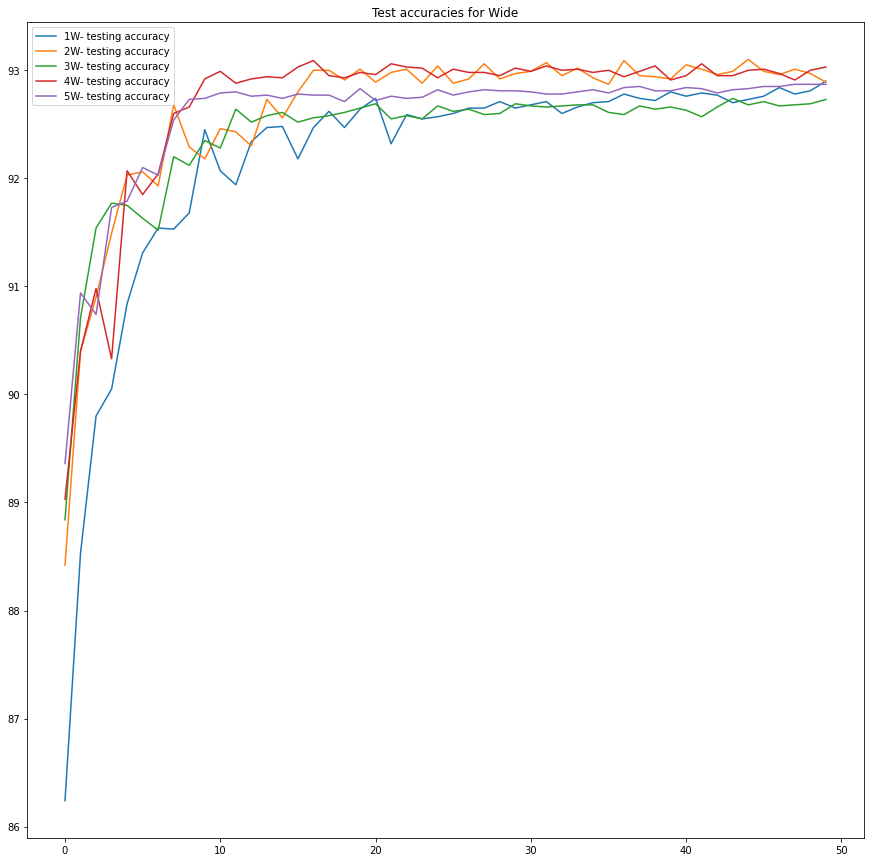

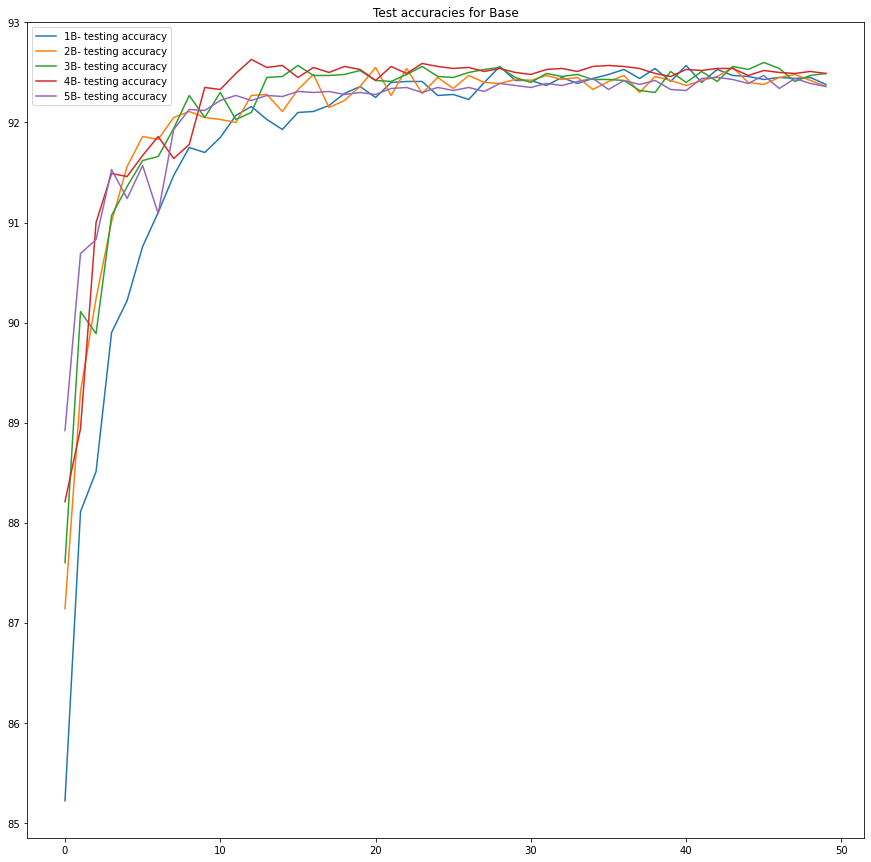

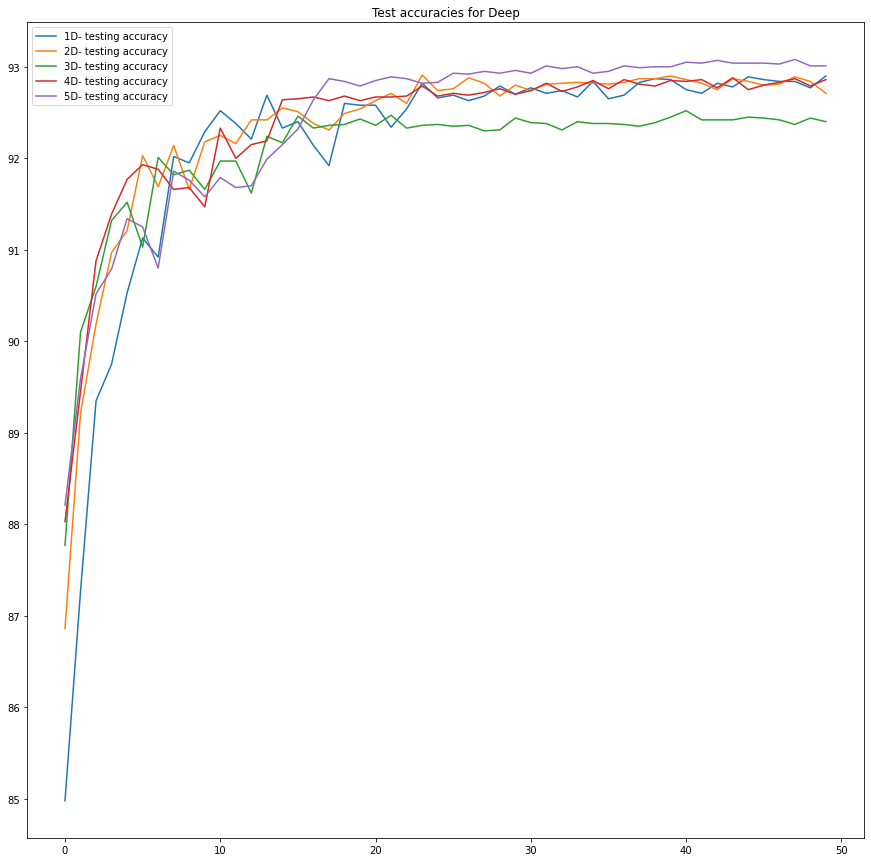

In [100]:
#uncomment below line to get category wise test accuracies
#get_category_wise(test_acc,'Test accuracies for ')

In [104]:
def get_all_graphs_from_csv(csv):
    data=pd.read_csv(csv)
    data=preprocess(data)
    data_name=csv.split('_')[2]
    test_acc=data.filter(regex=".*testing accuracy")
    train_test_acc=data.filter(regex=".*accuracy")
    train_acc=data.filter(regex=".*training accuracy")
    train_loss=data.filter(regex=".*loss")
    get_model_wise(test_acc,str(data_name)+' test accuracies for model ')
    get_category_wise(test_acc,str(data_name)+' Test accuracies for ')
    get_category_wise(train_acc,str(data_name)+' Train accuracies for ')
    get_model_wise(train_test_acc,str(data_name)+' train VS test accuracies for model ')

# Graphs for all CSVS

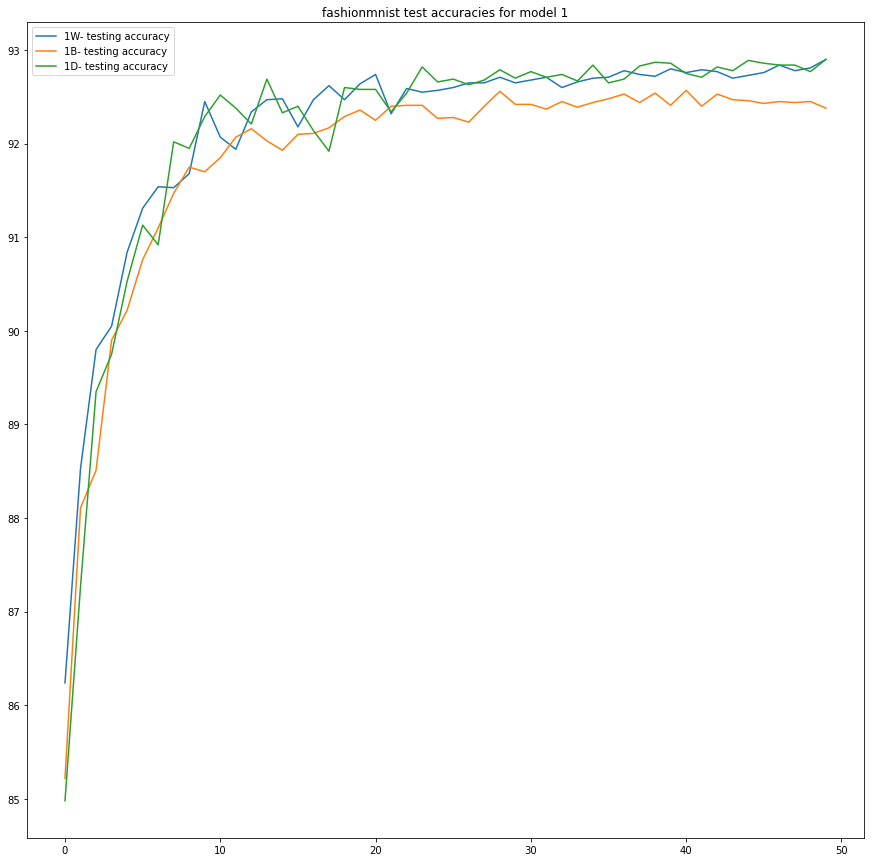

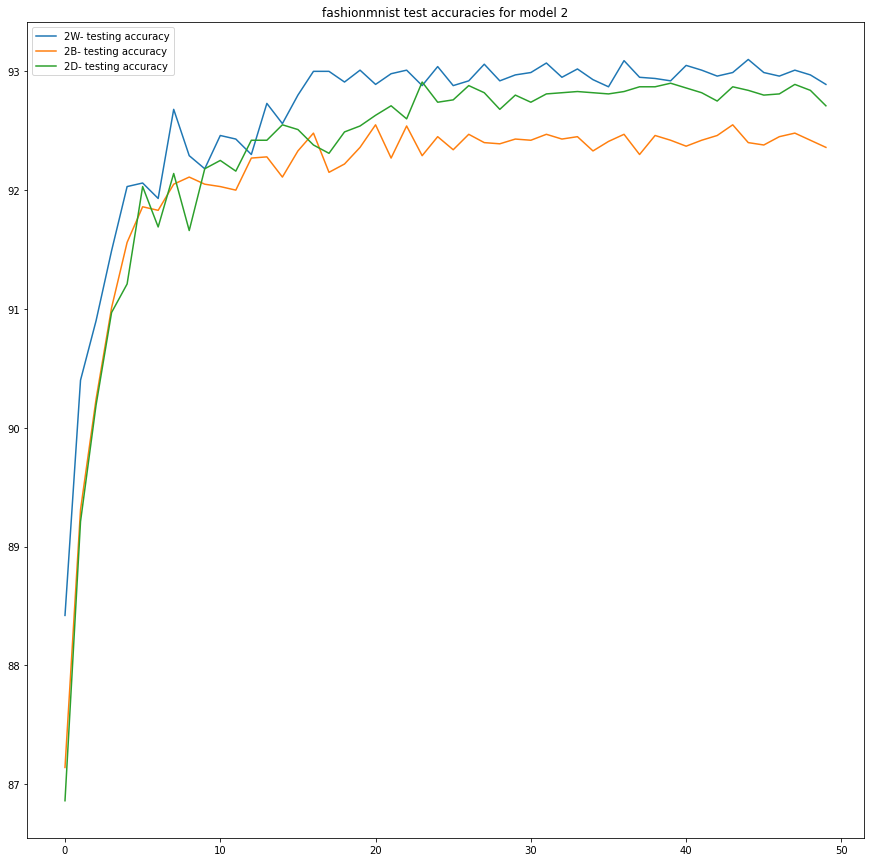

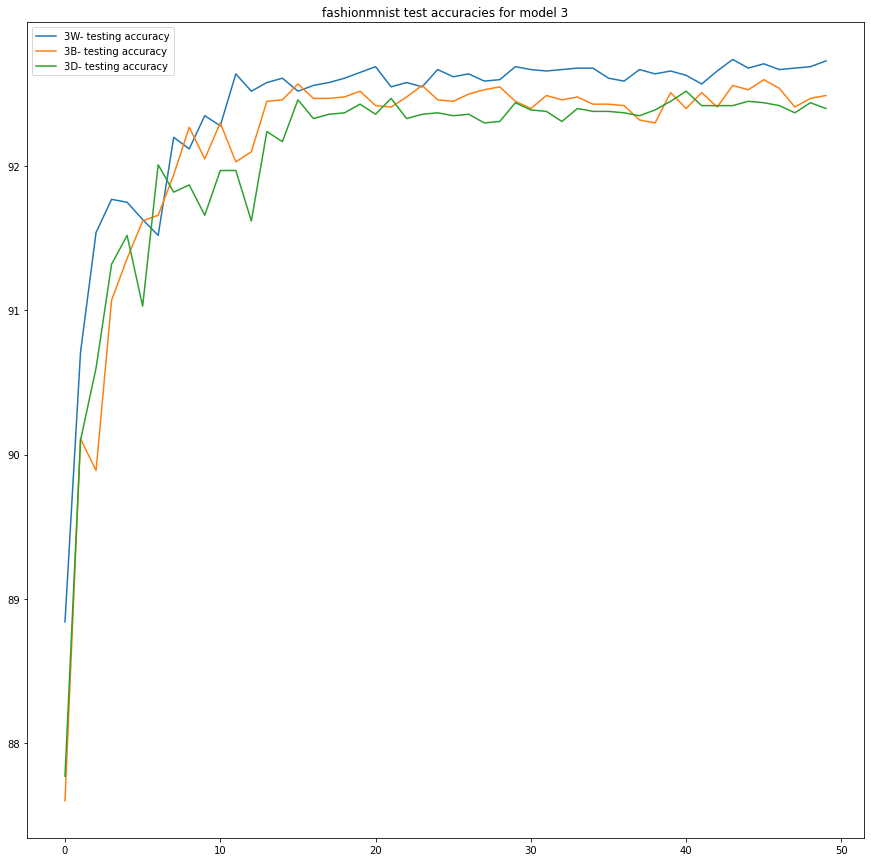

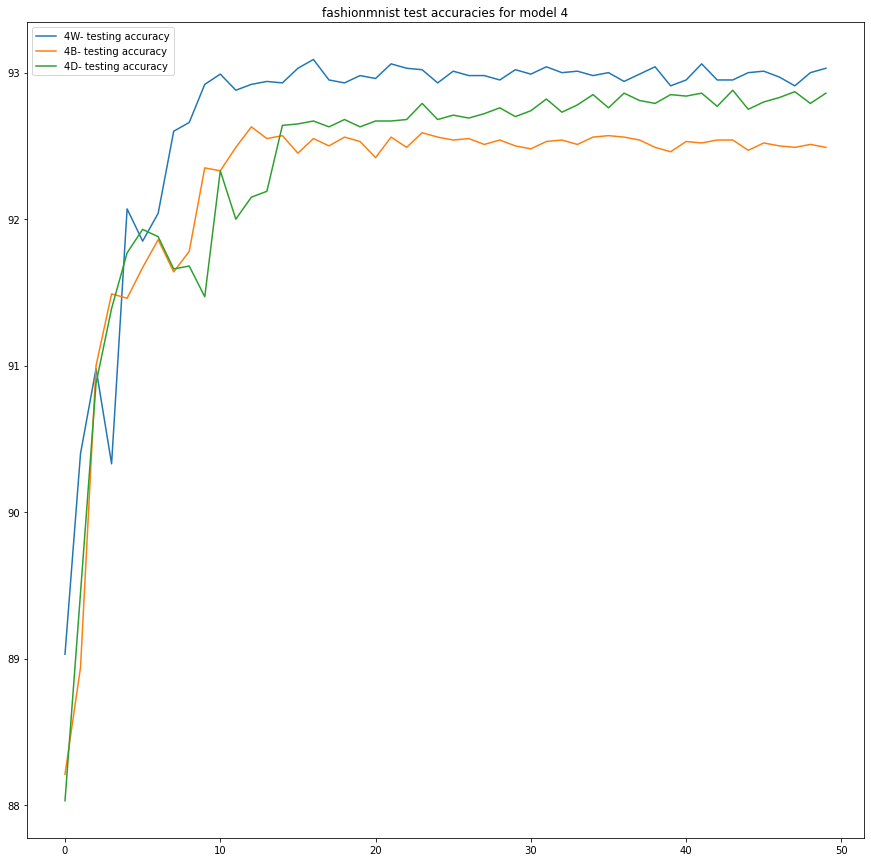

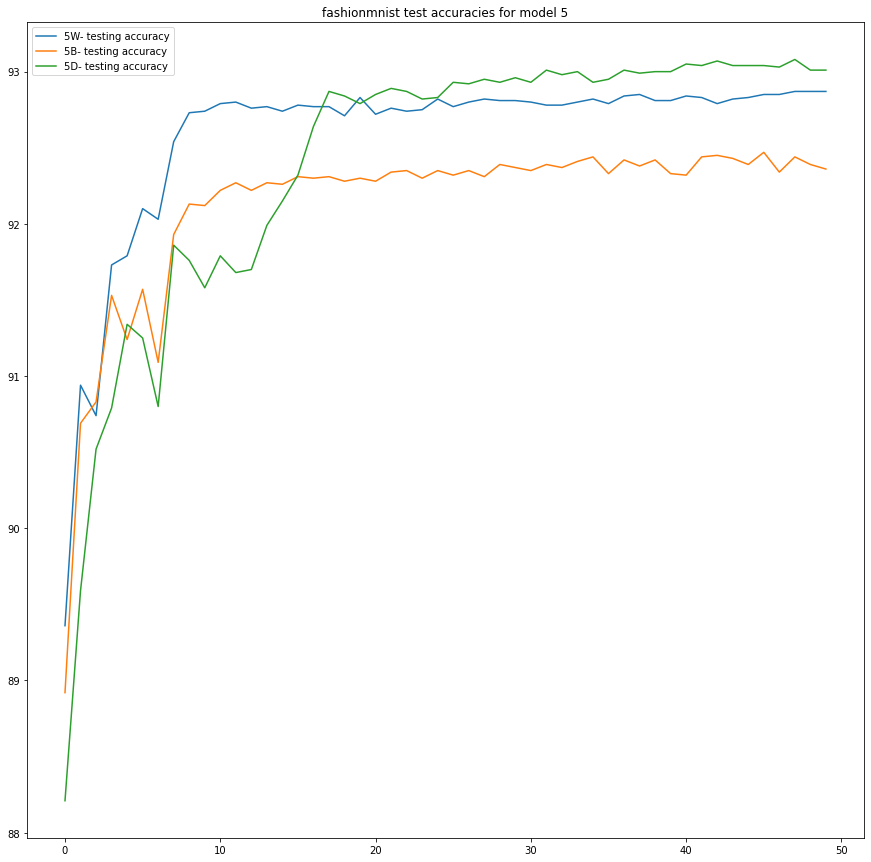

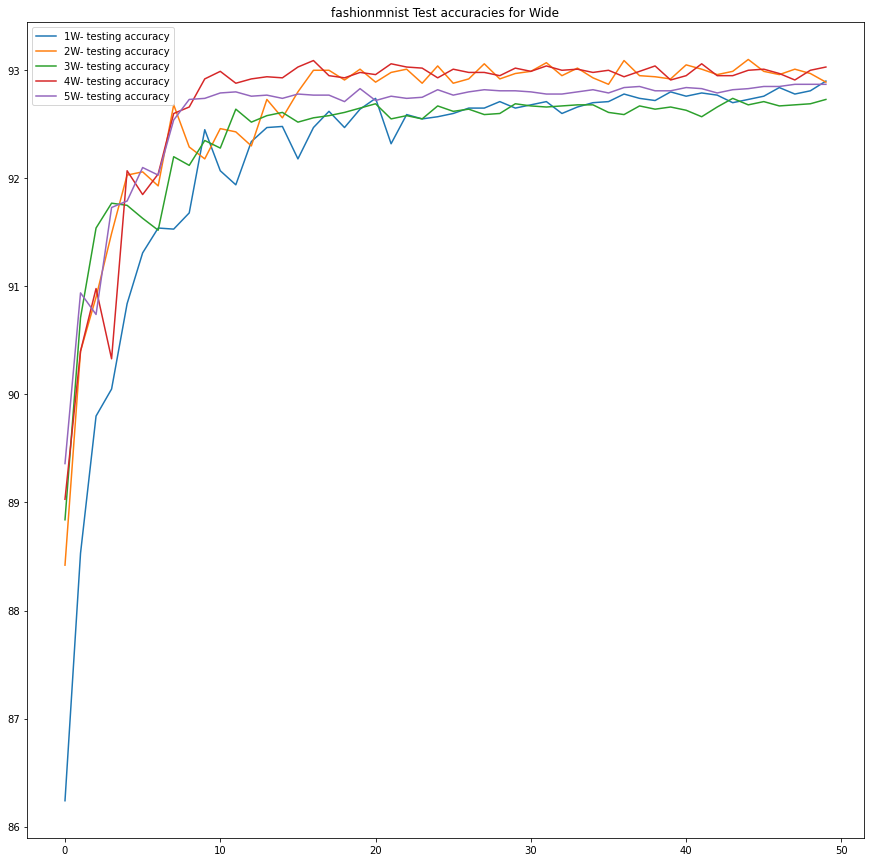

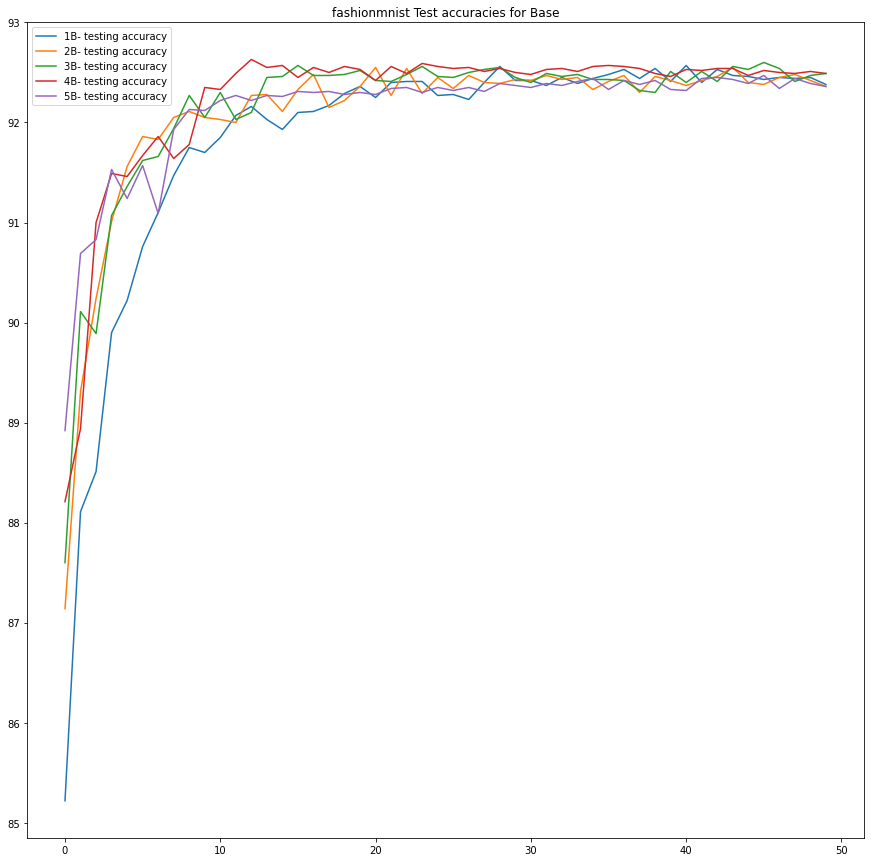

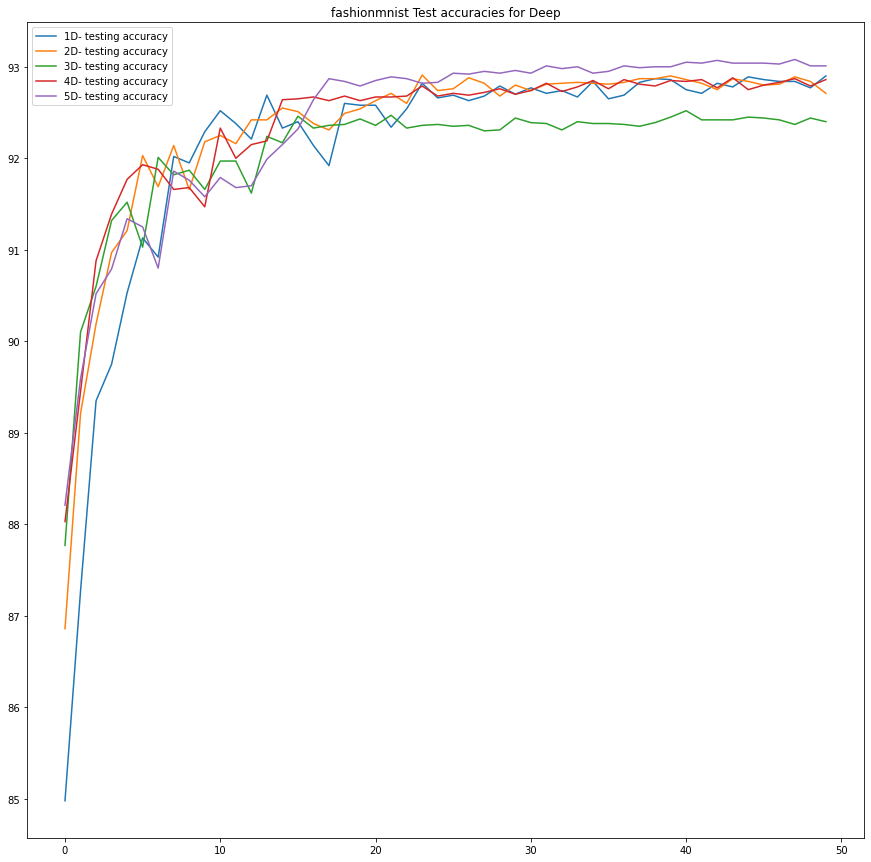

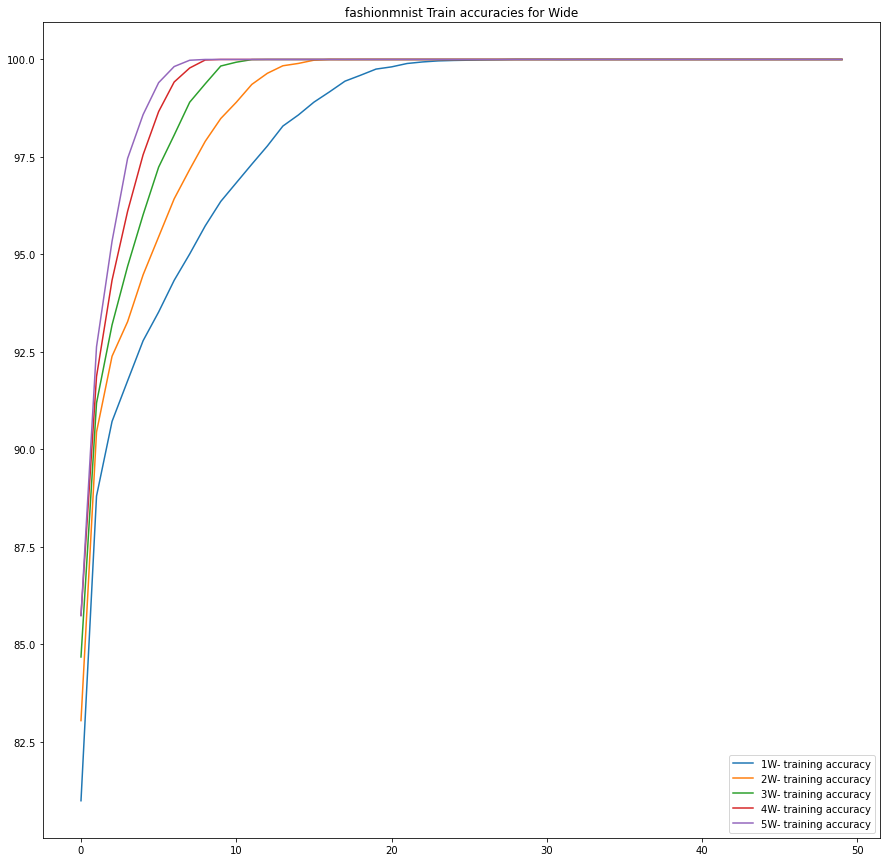

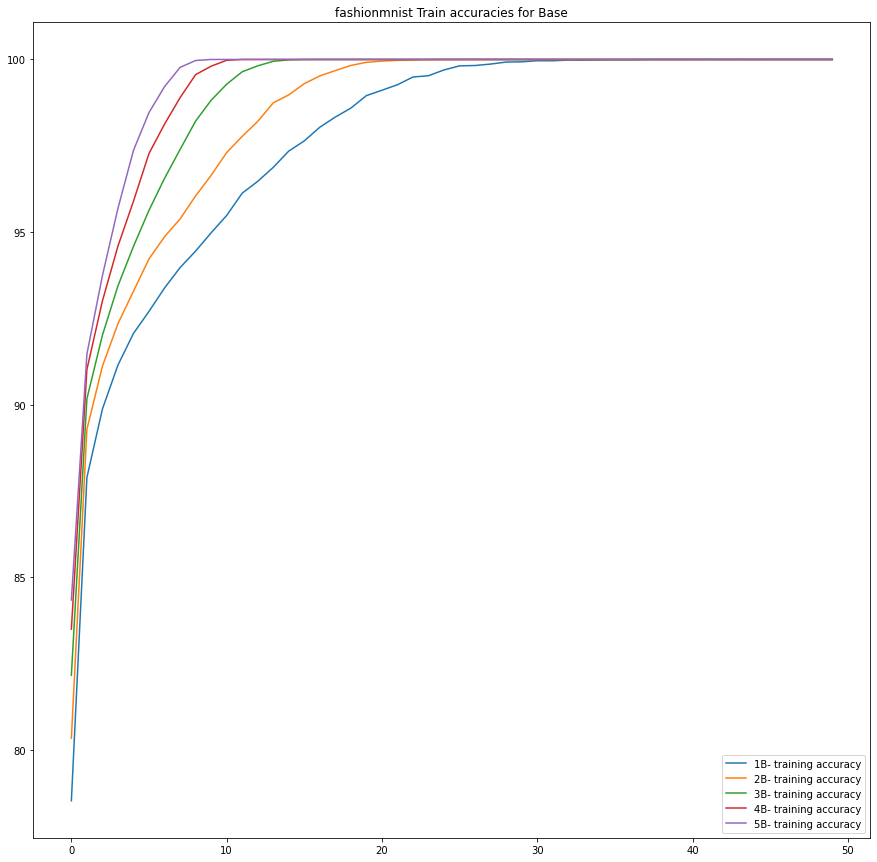

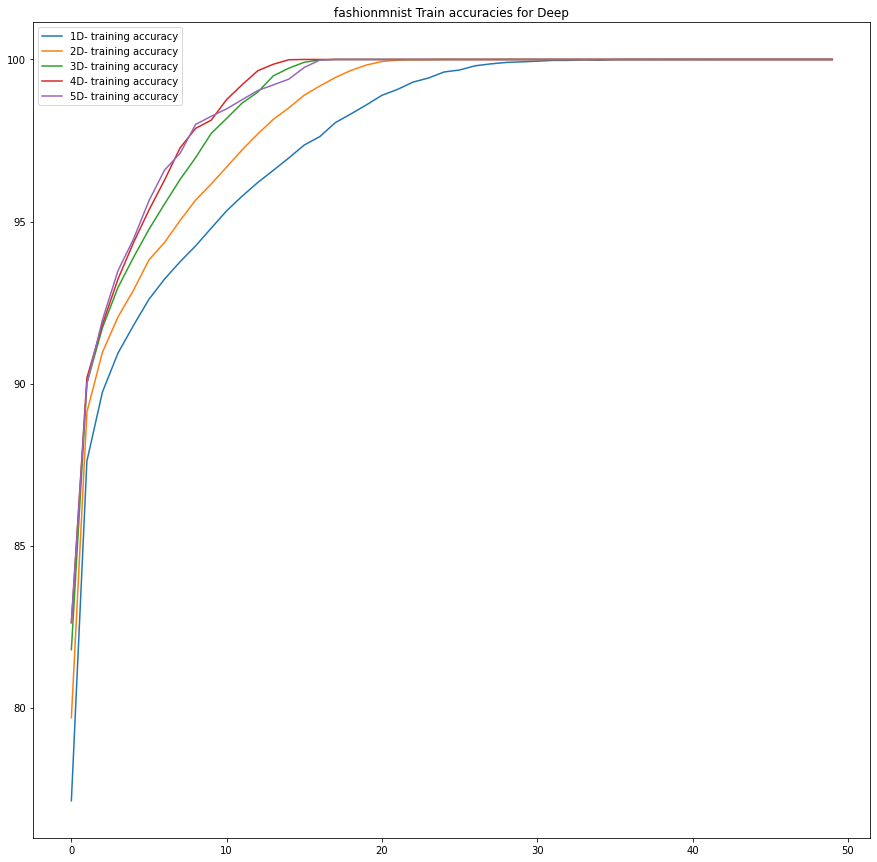

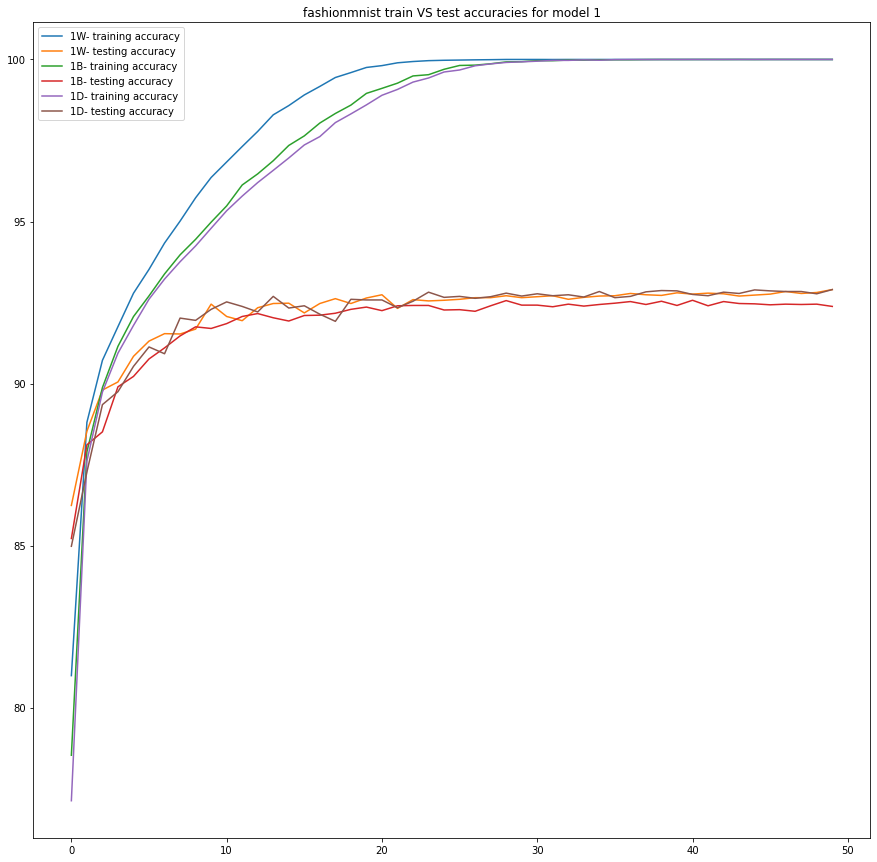

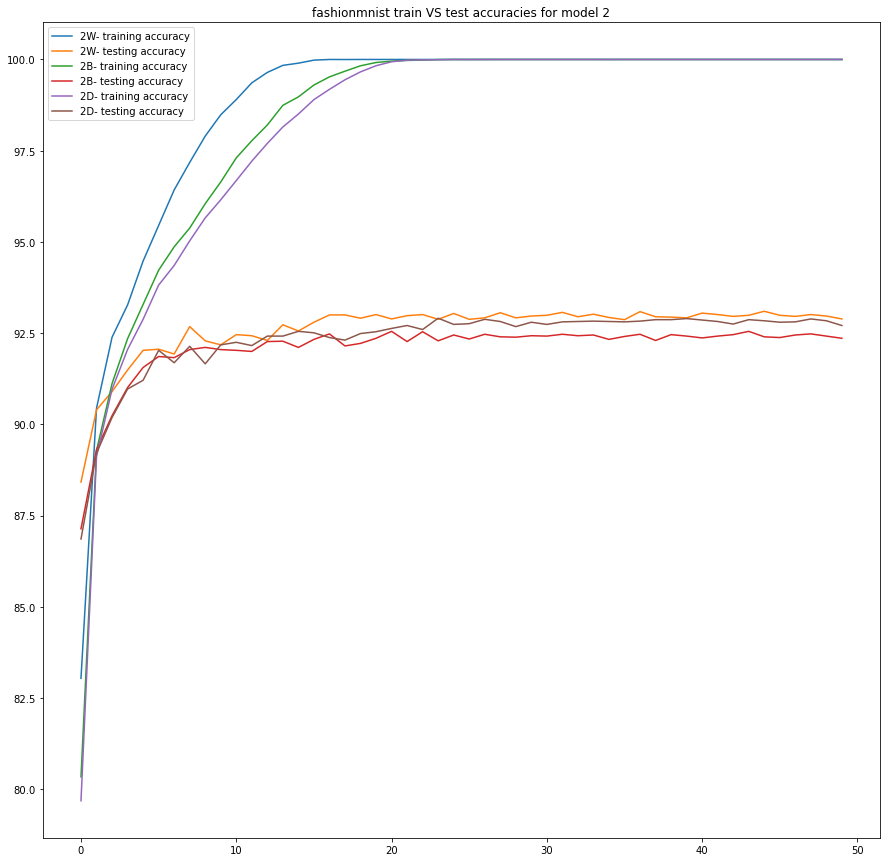

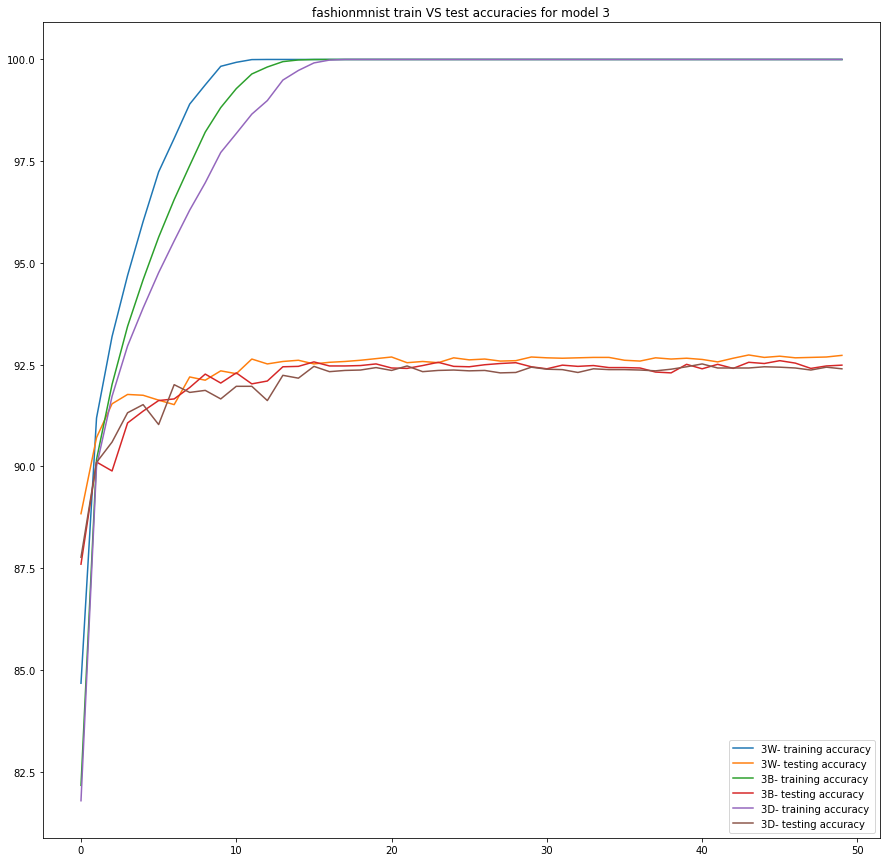

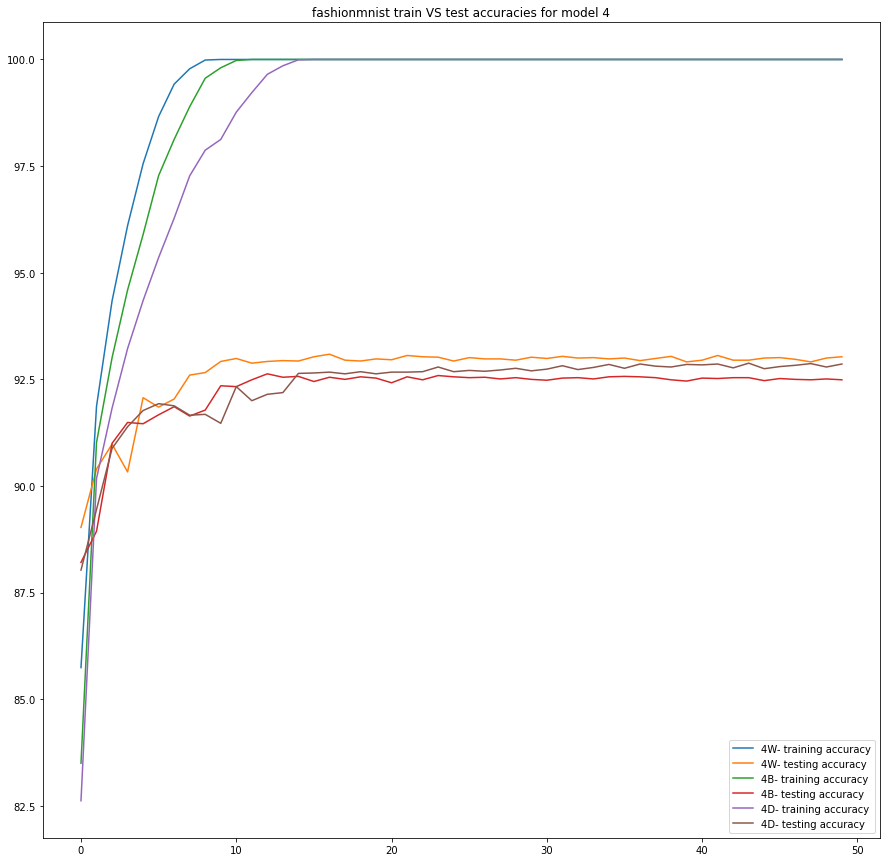

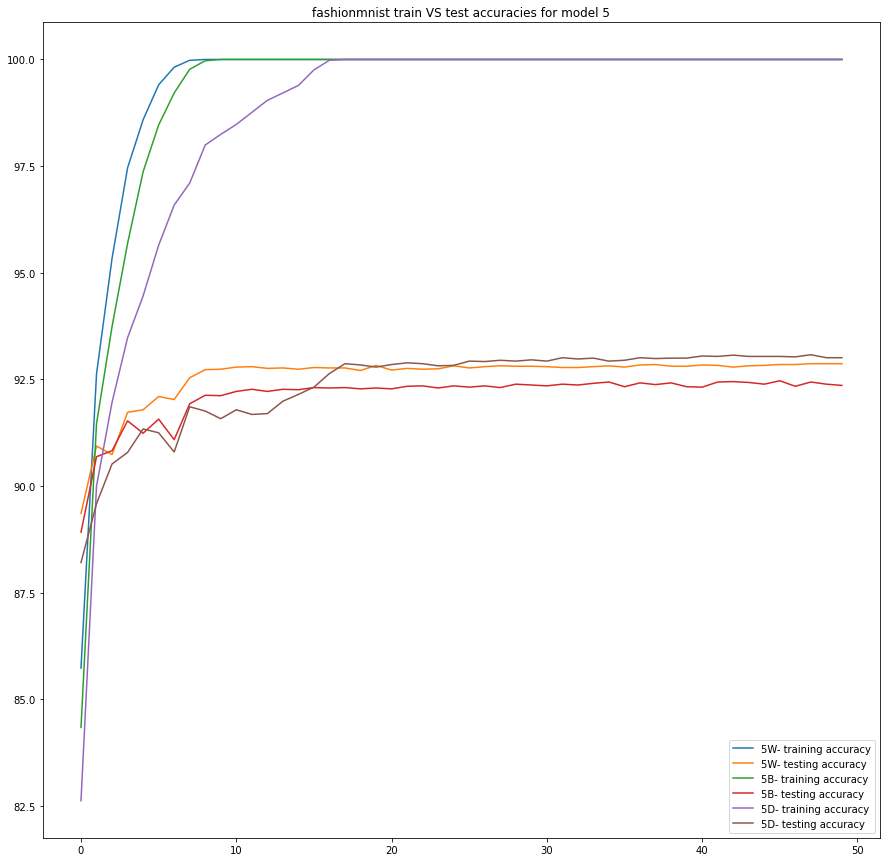

In [105]:
get_all_graphs_from_csv('net_results_fashionmnist_full.csv')

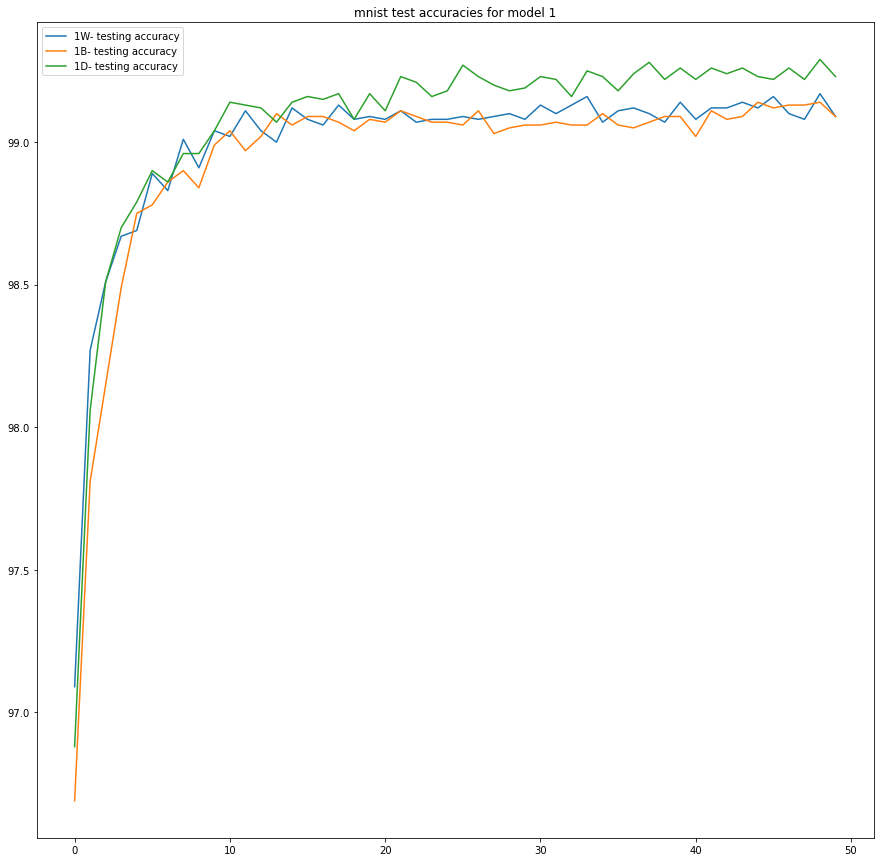

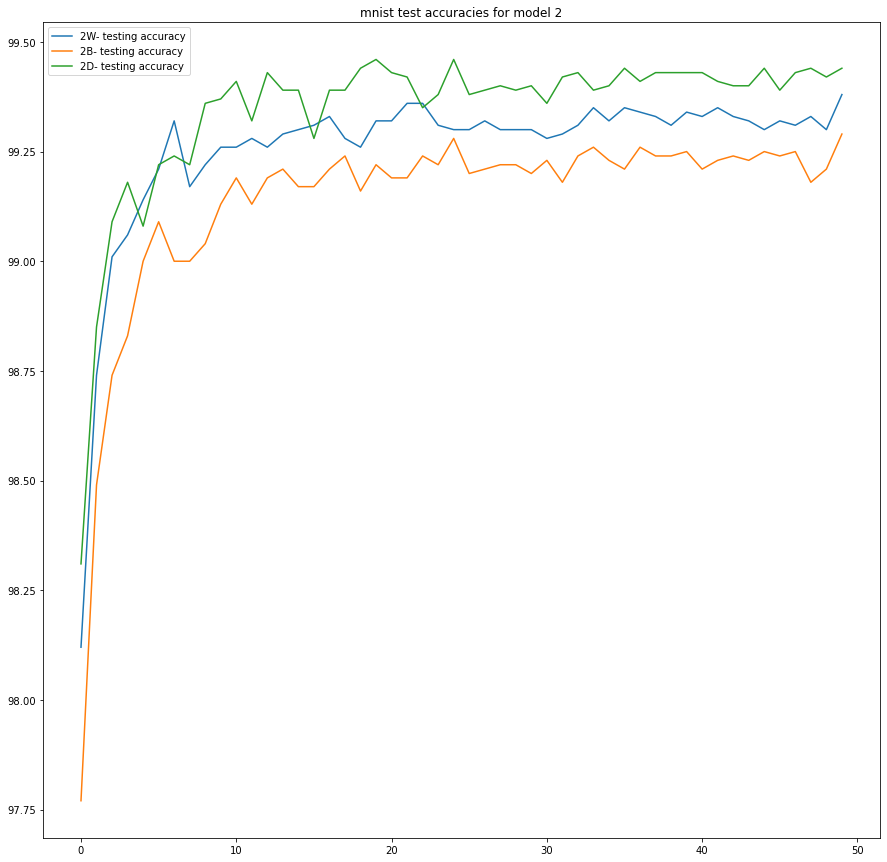

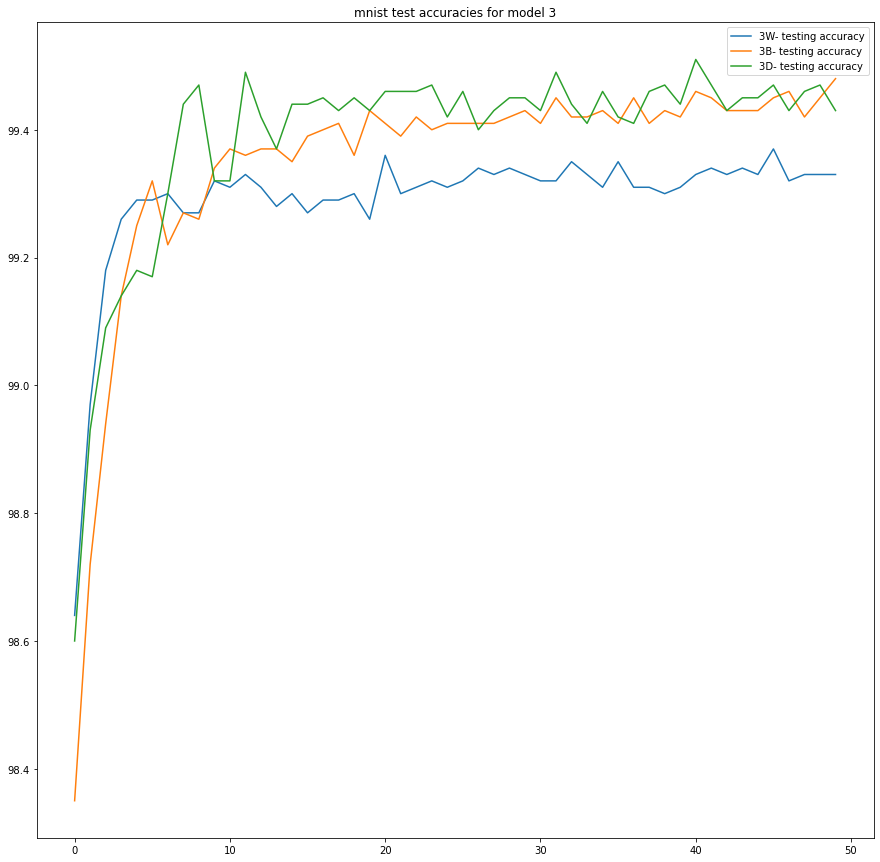

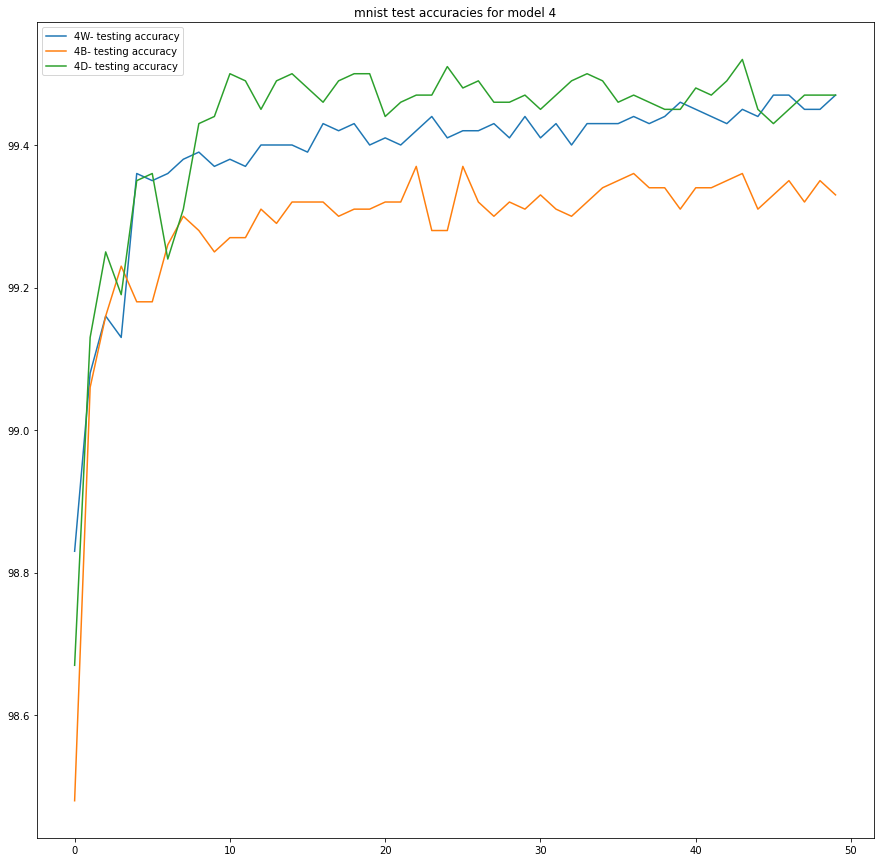

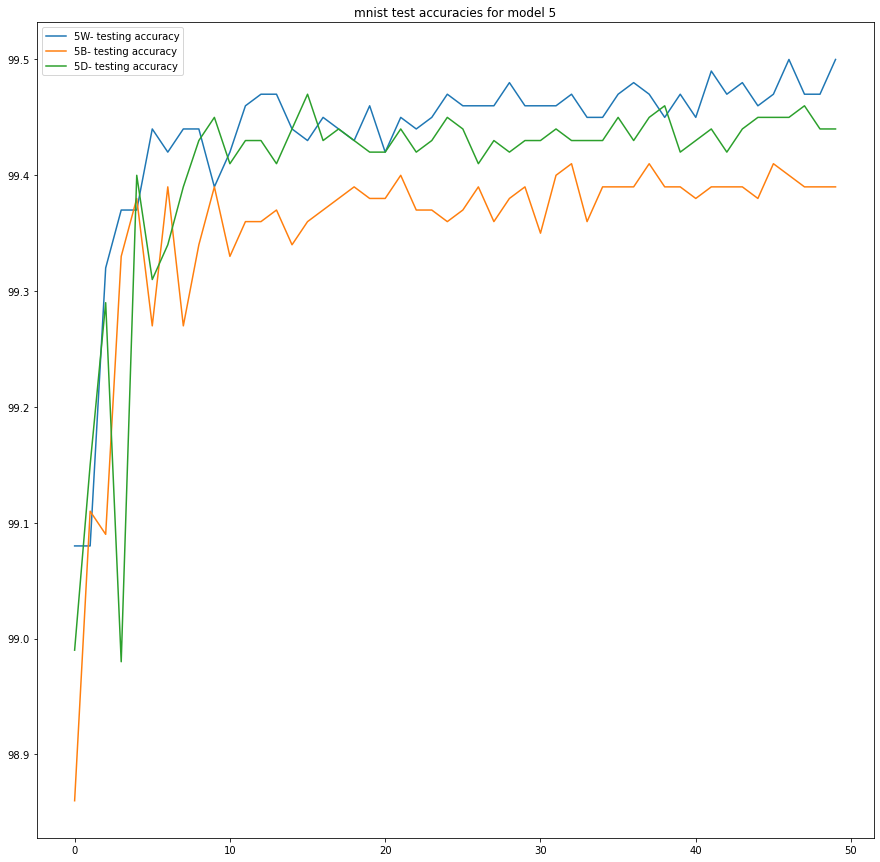

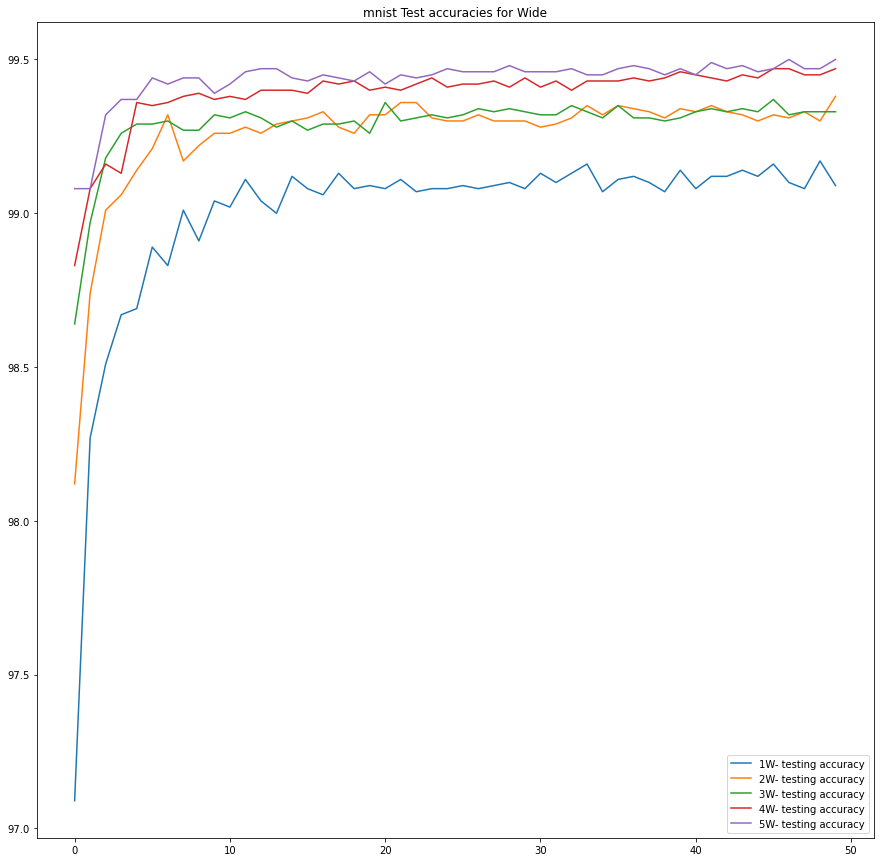

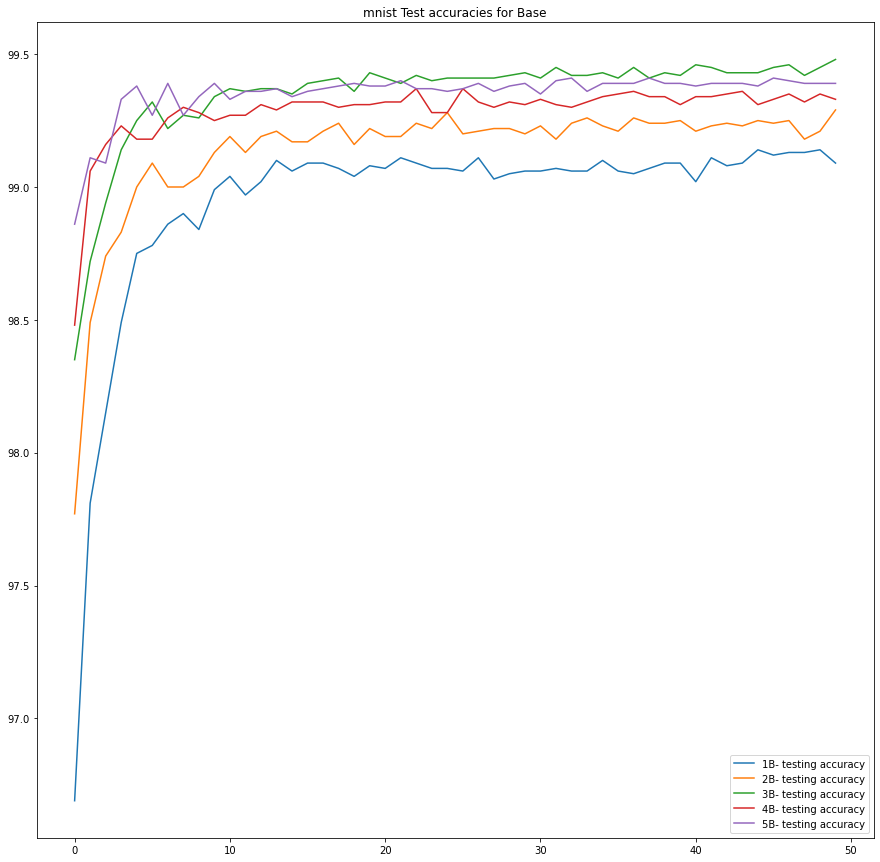

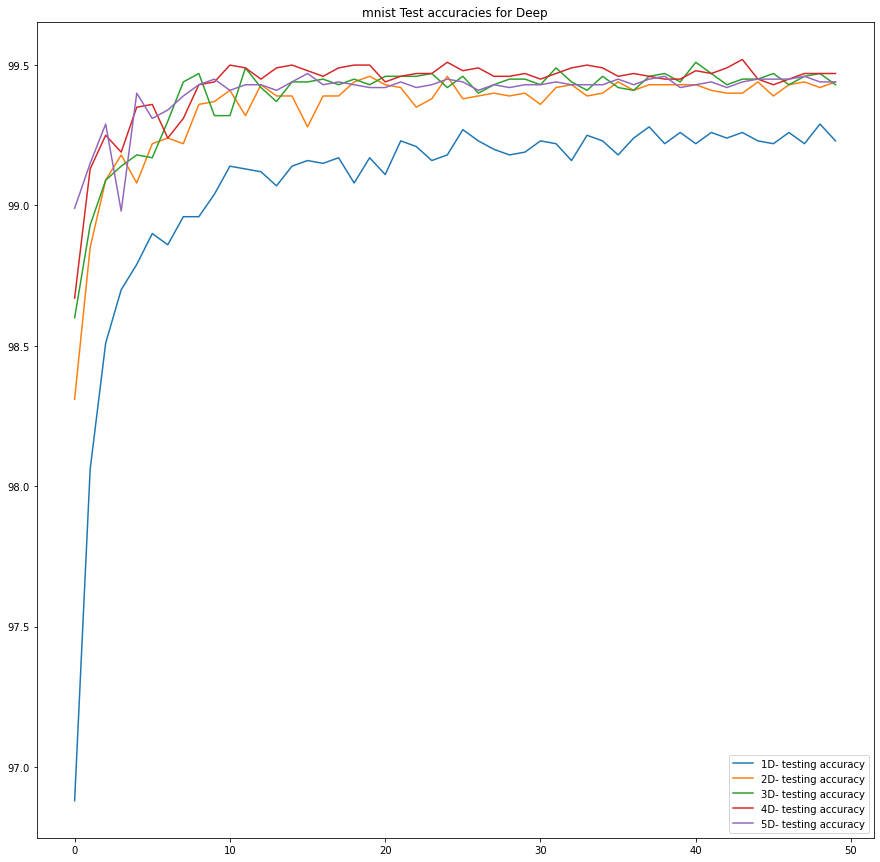

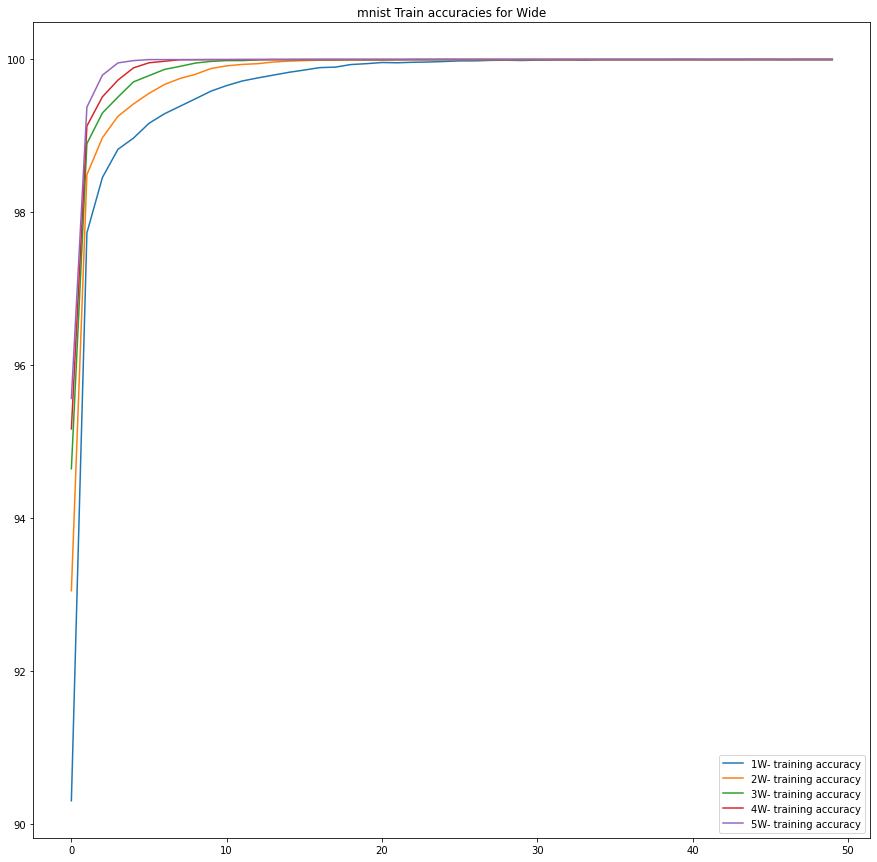

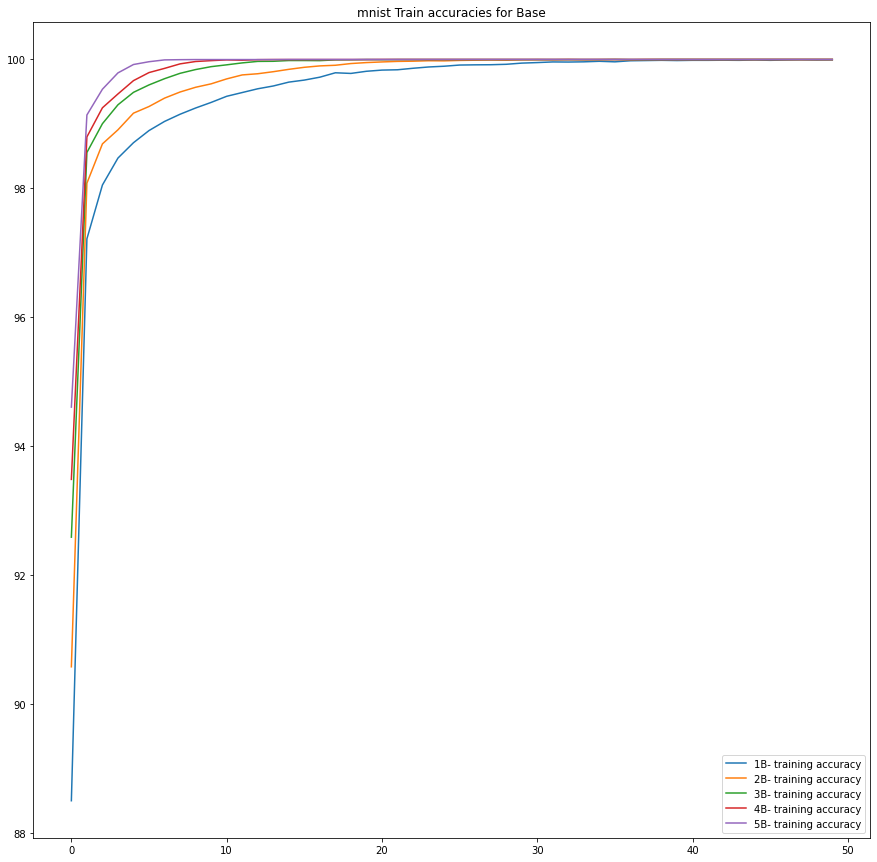

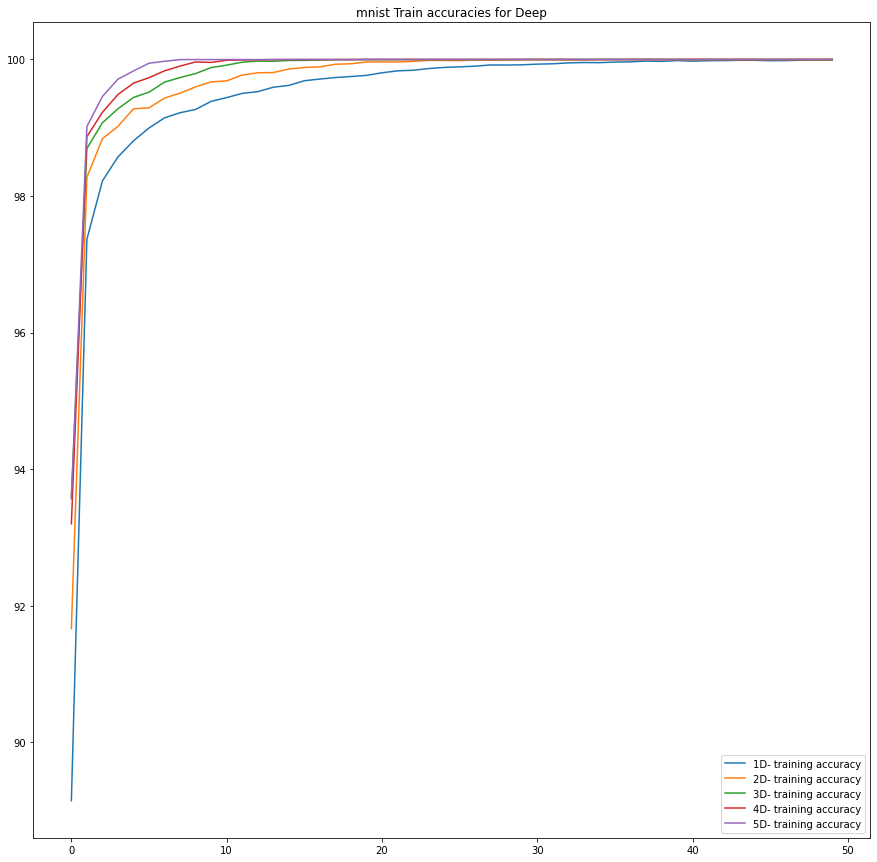

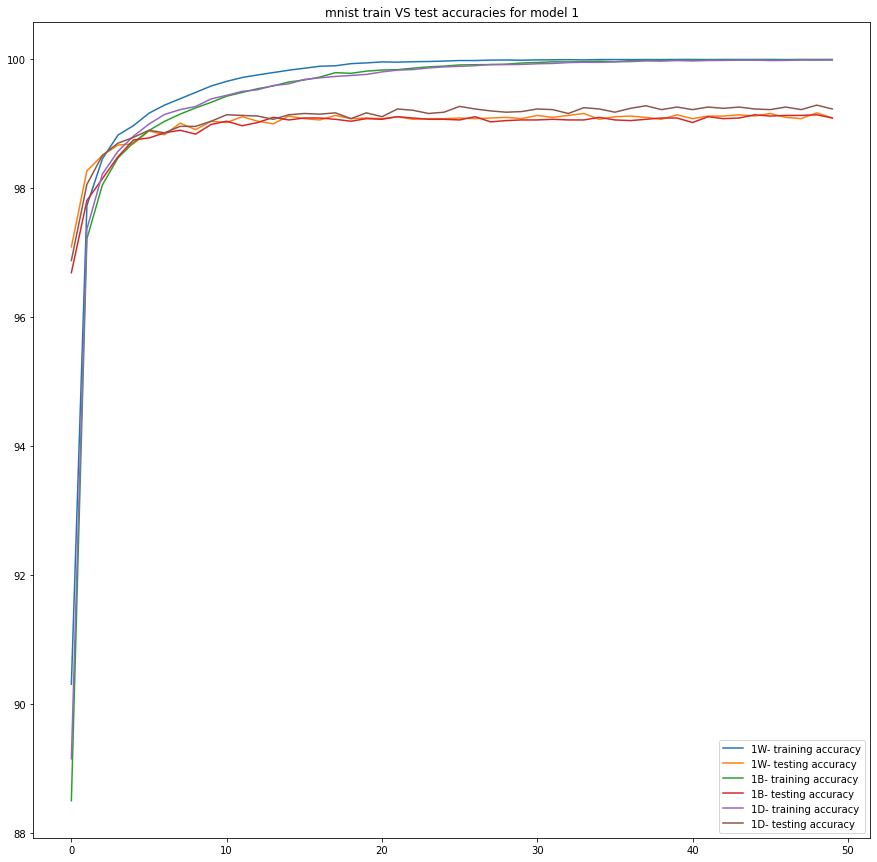

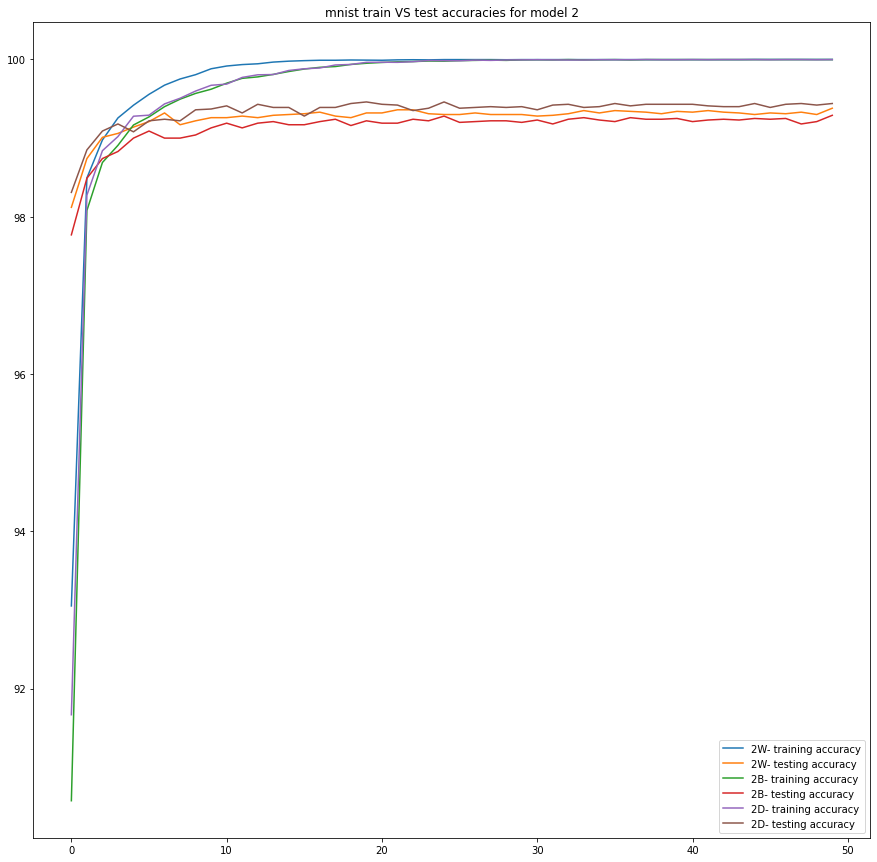

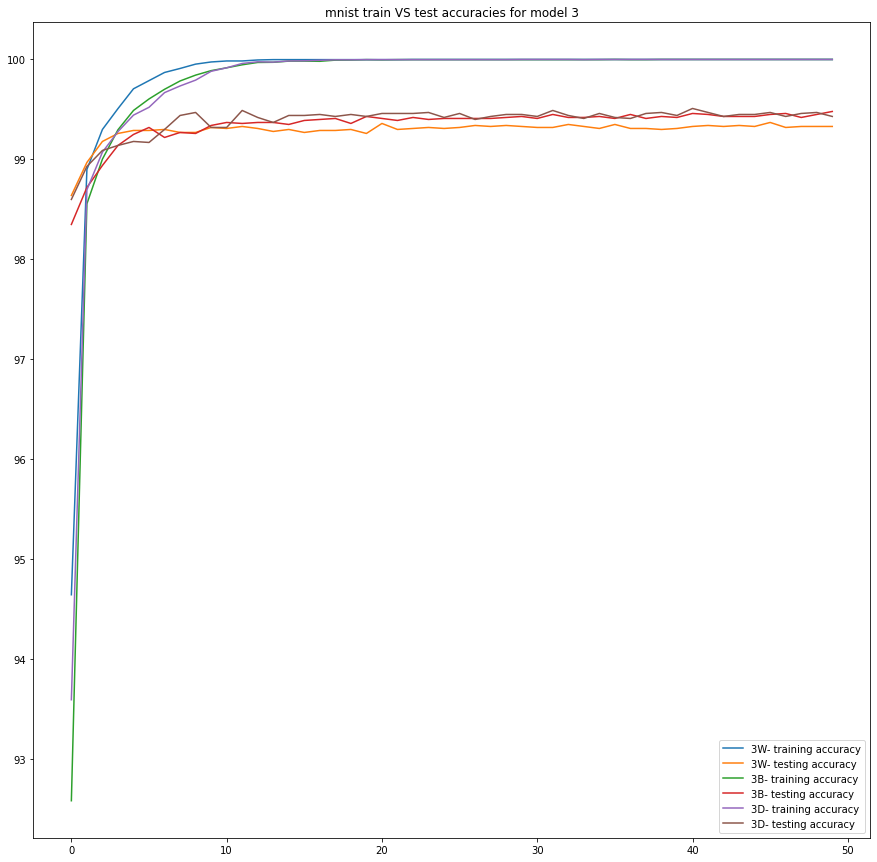

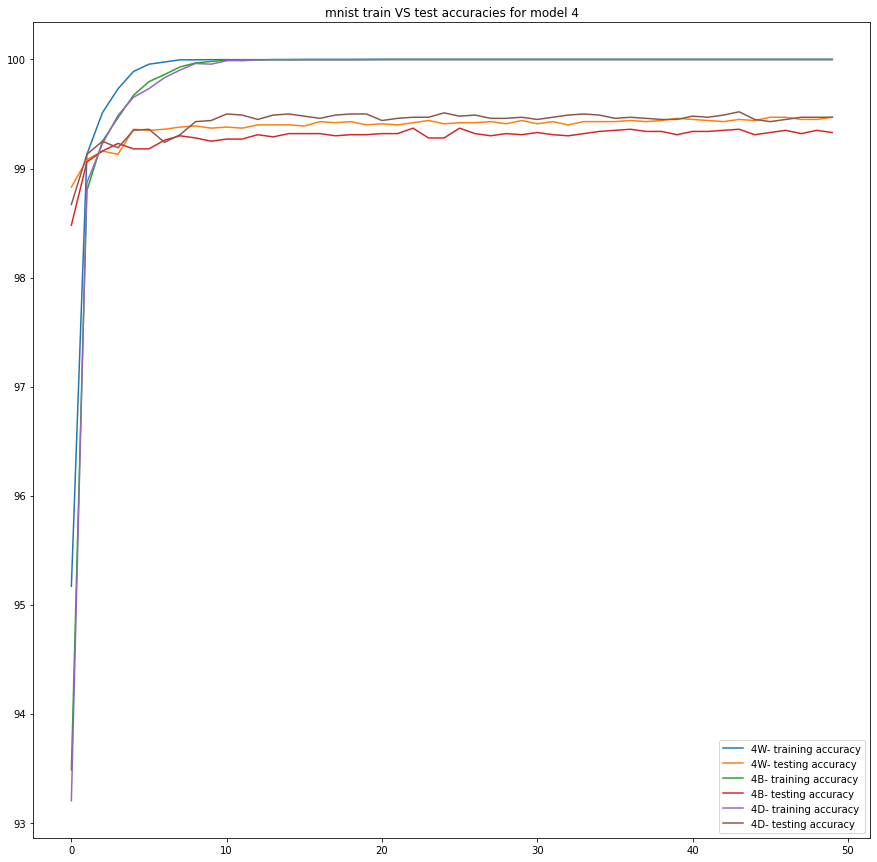

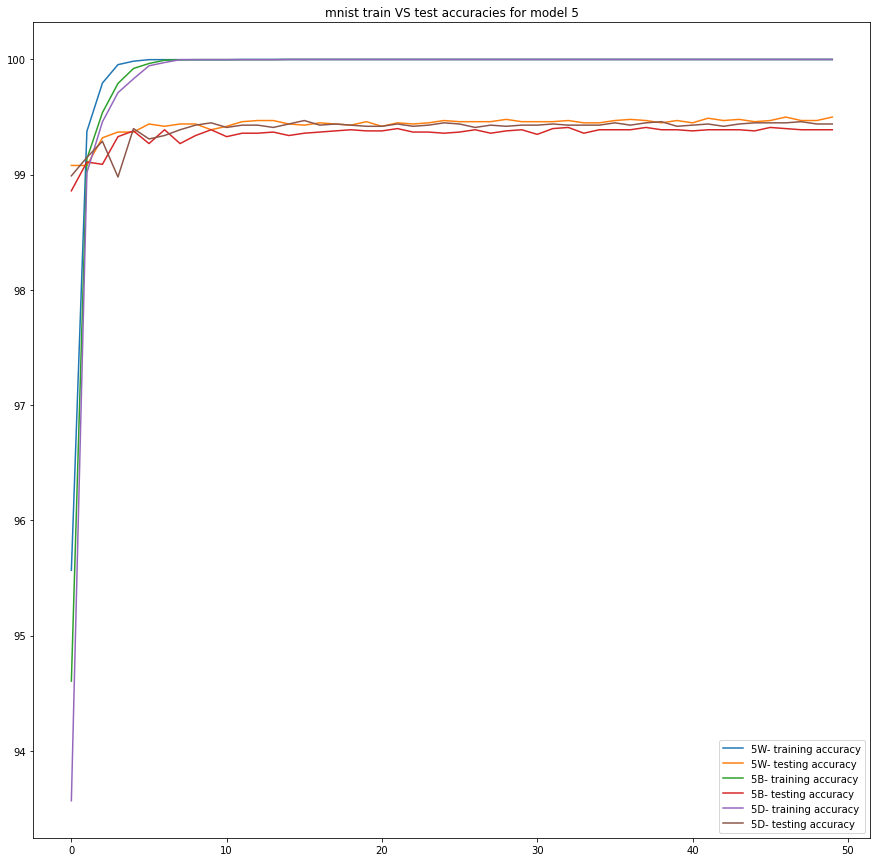

In [106]:
get_all_graphs_from_csv('net_results_mnist_full.csv')

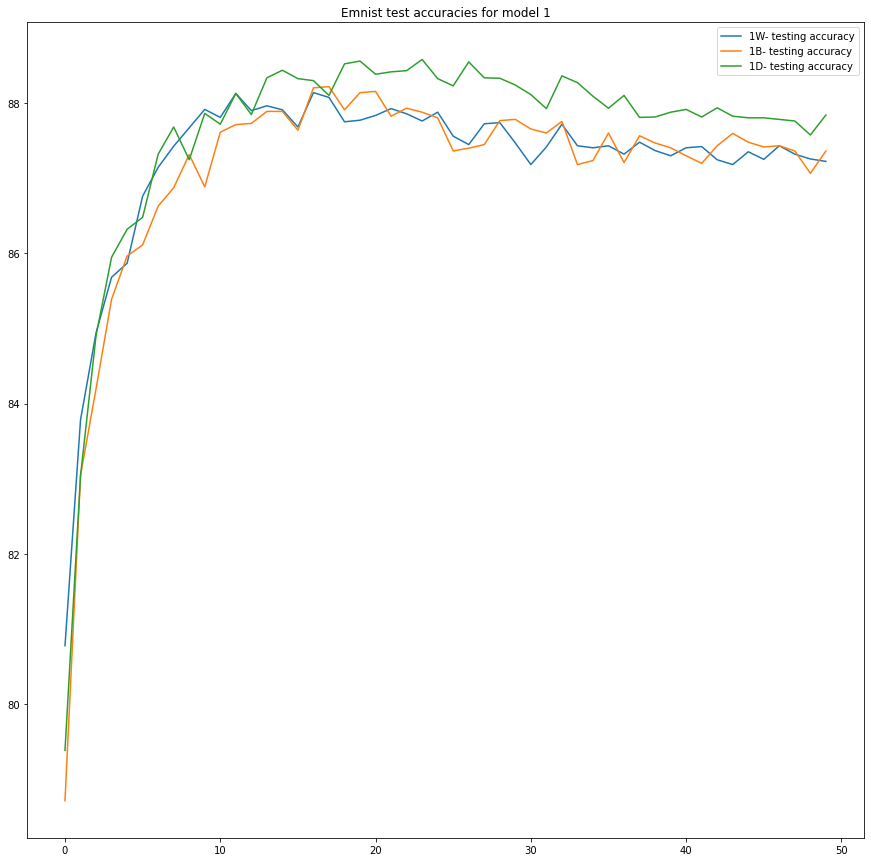

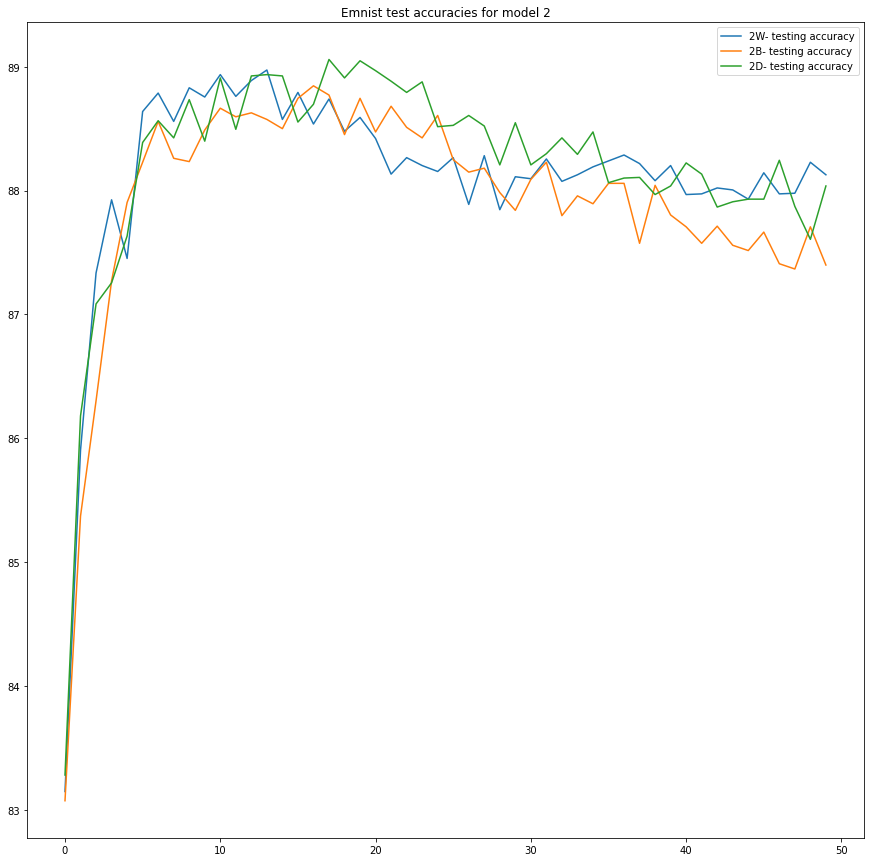

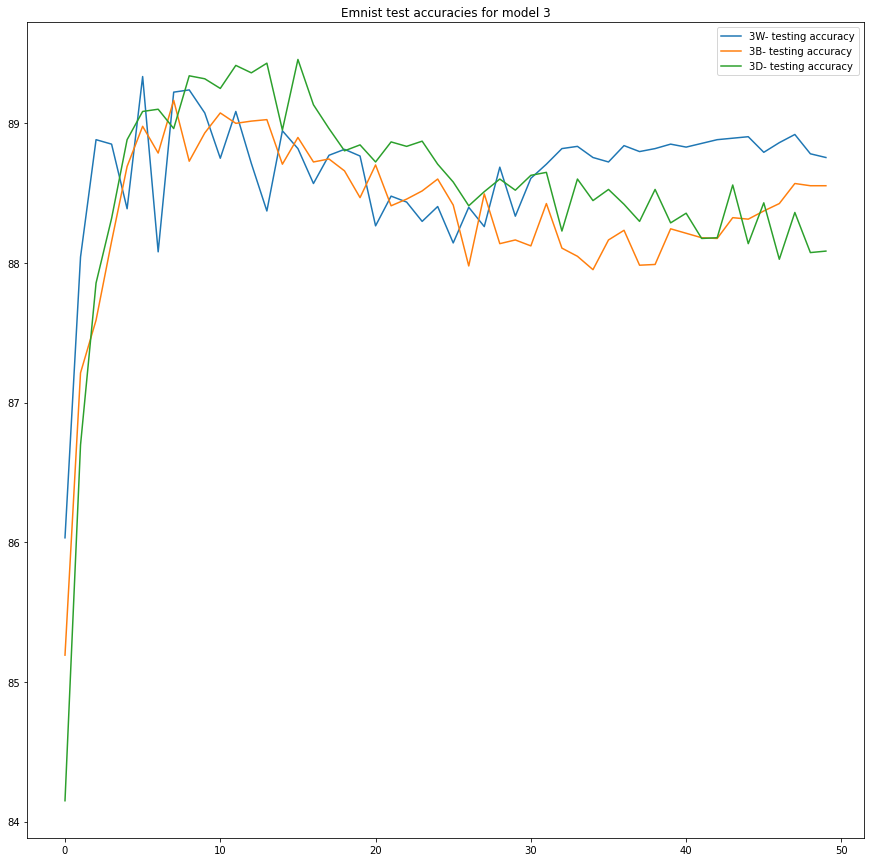

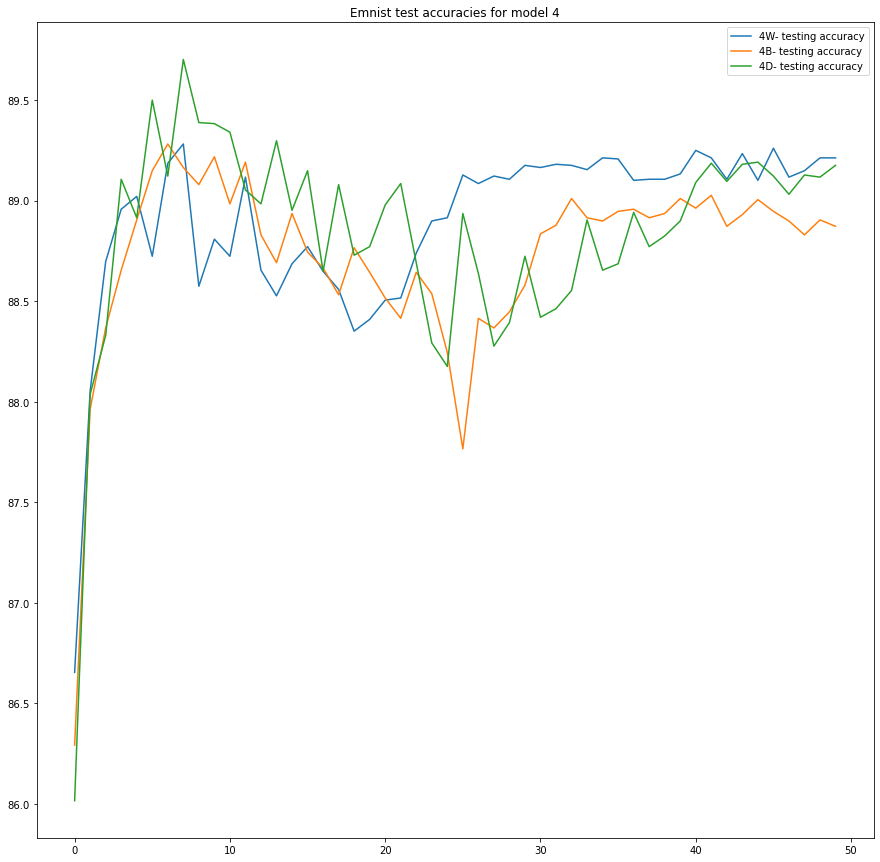

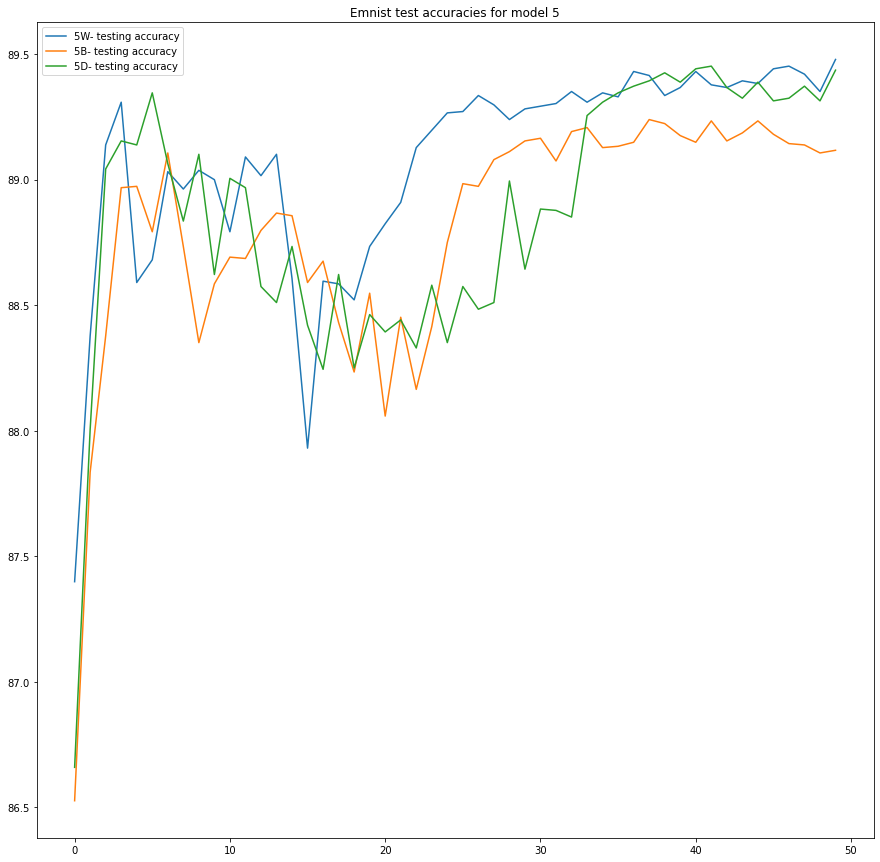

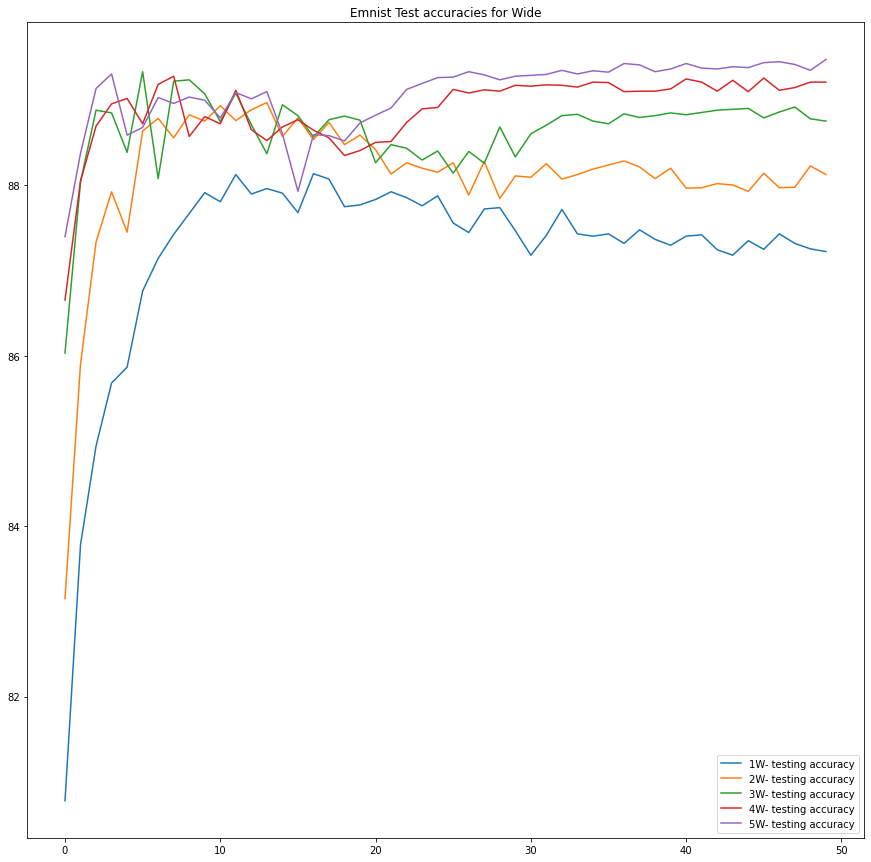

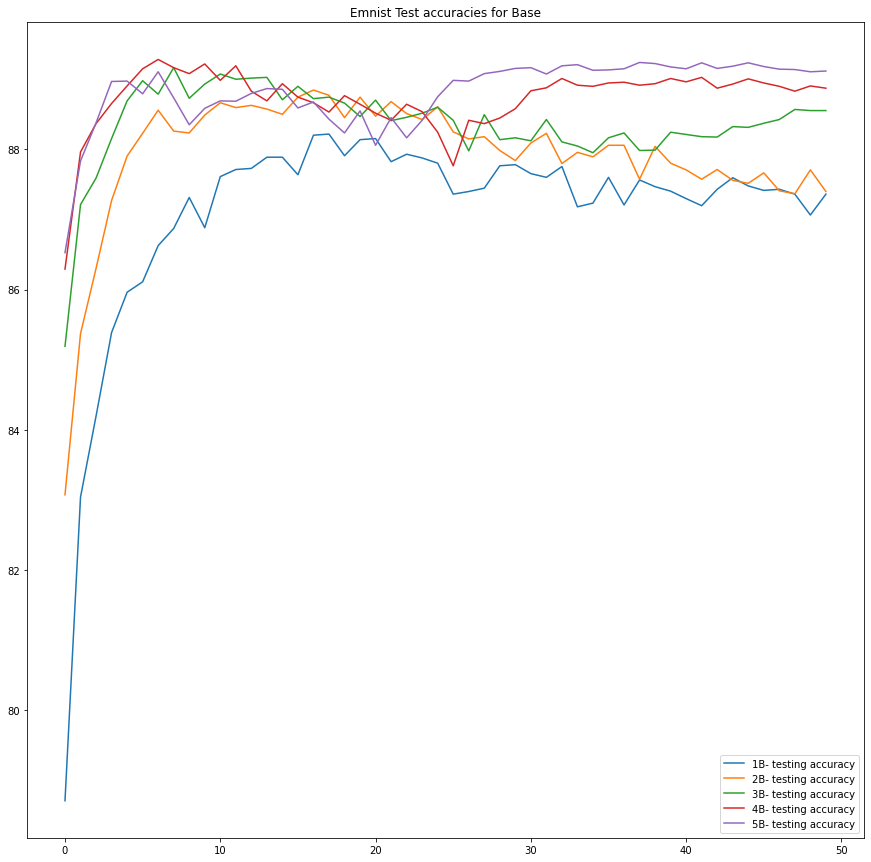

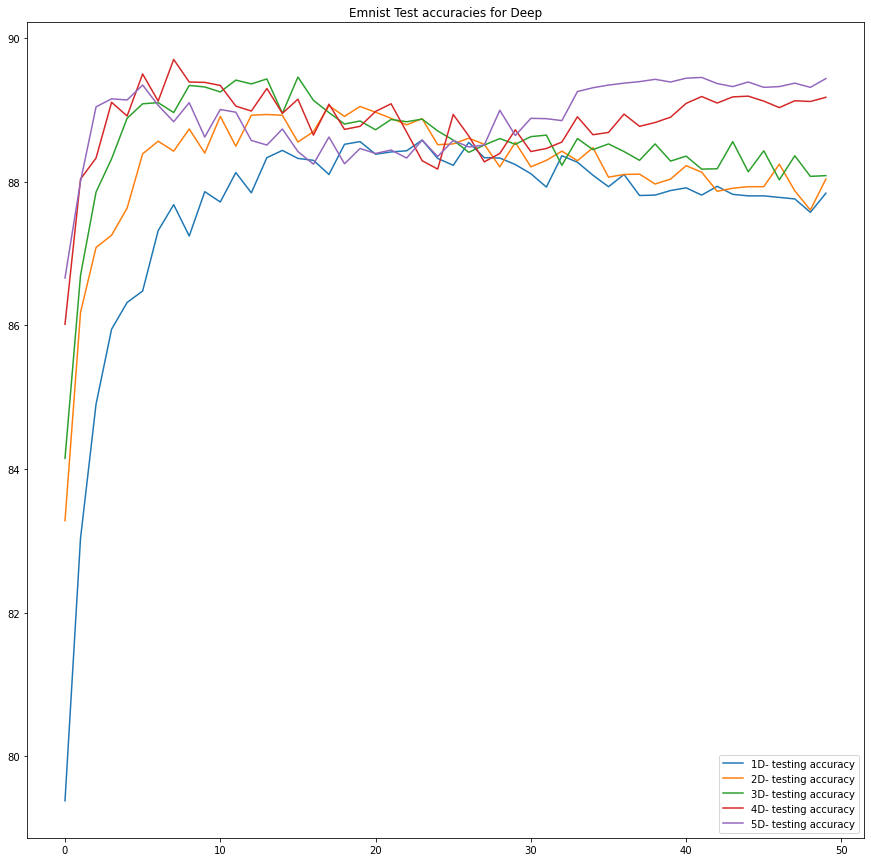

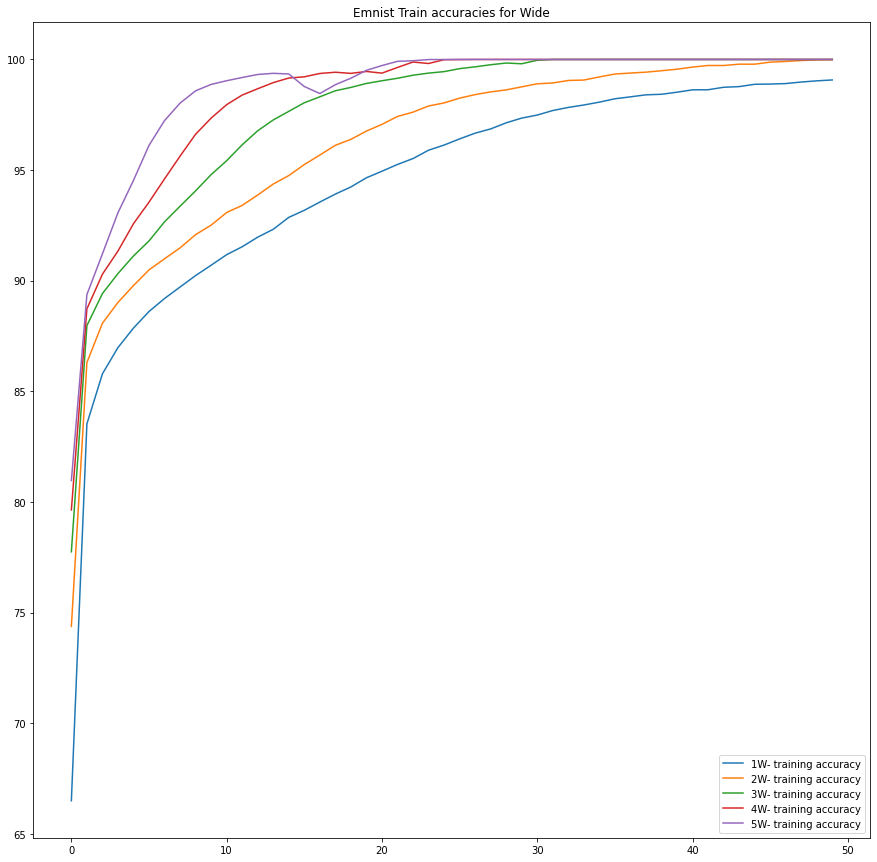

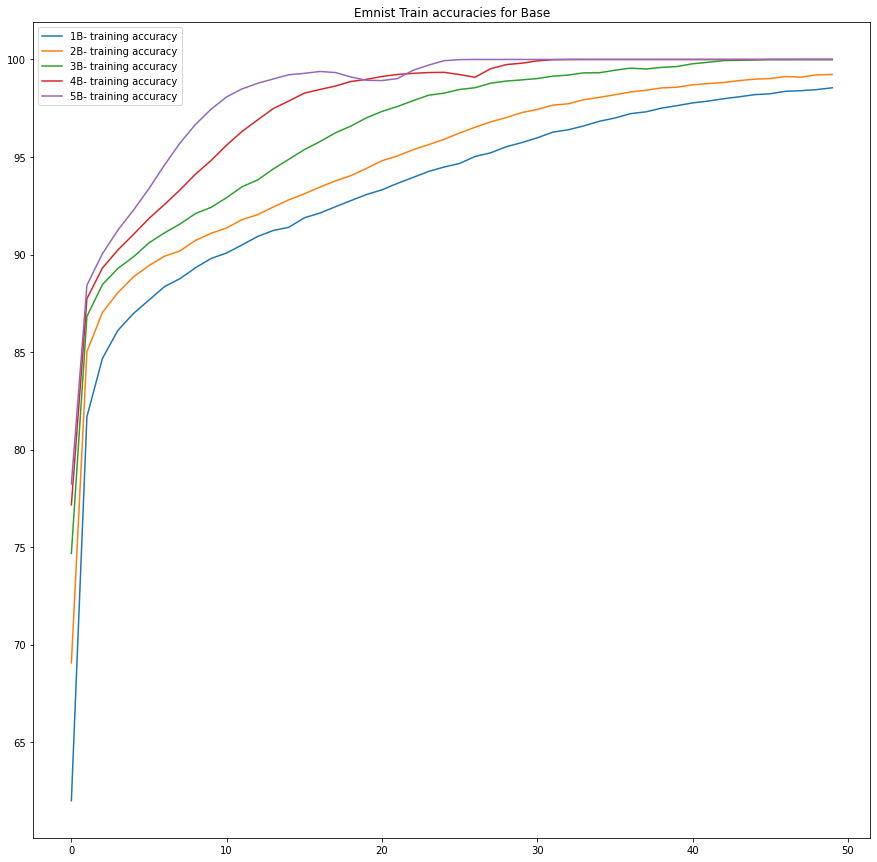

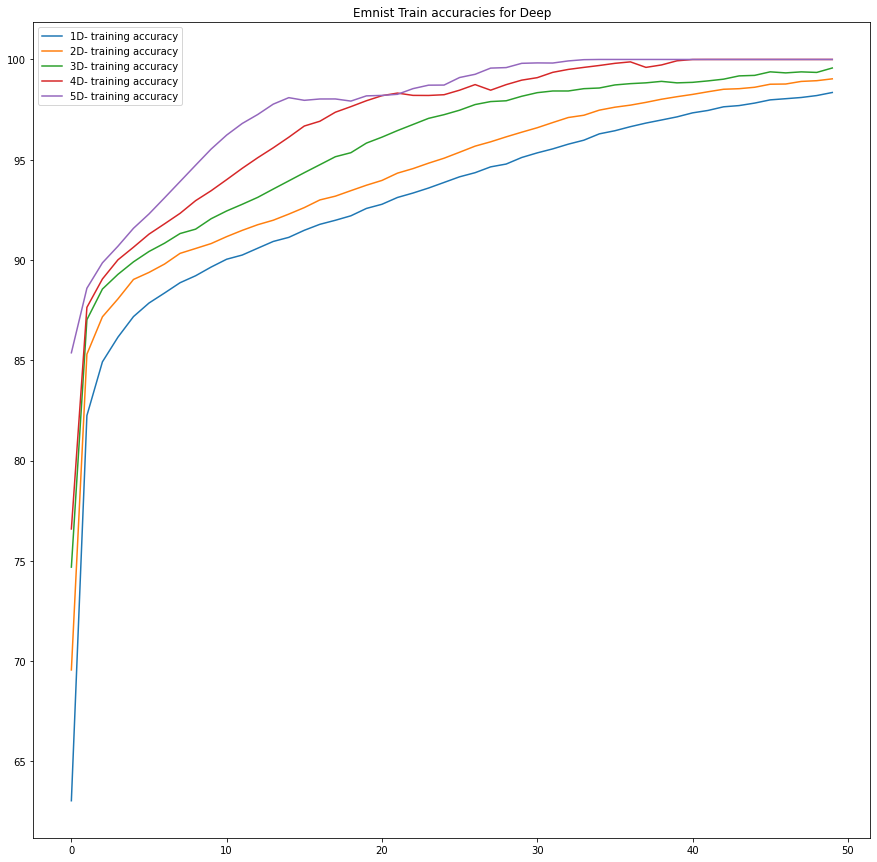

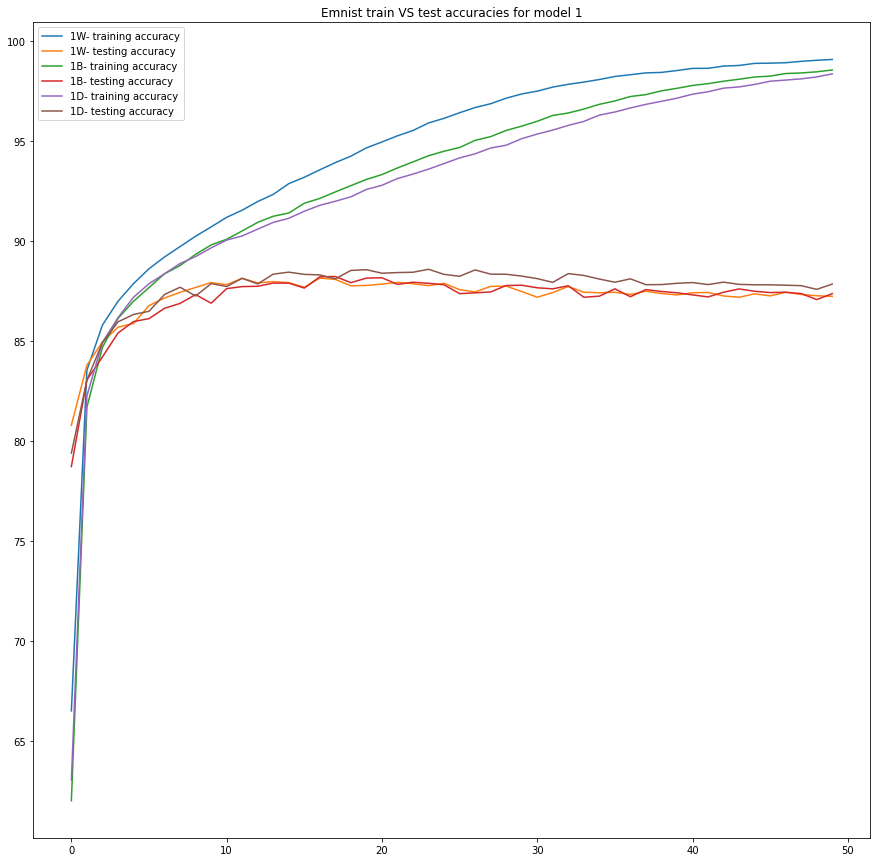

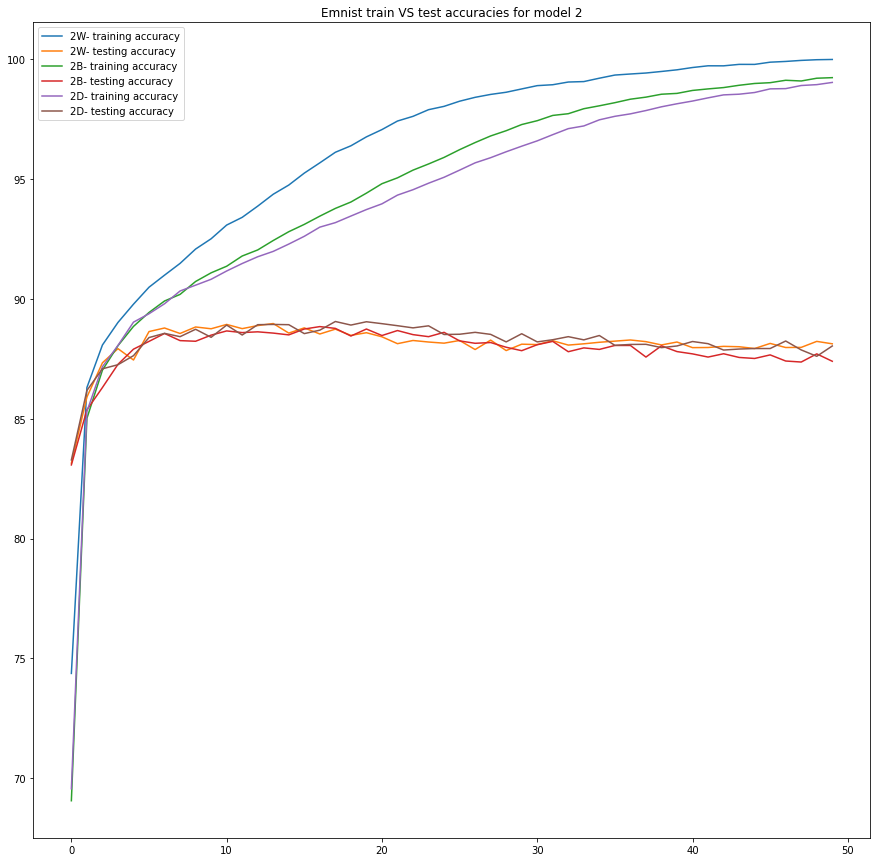

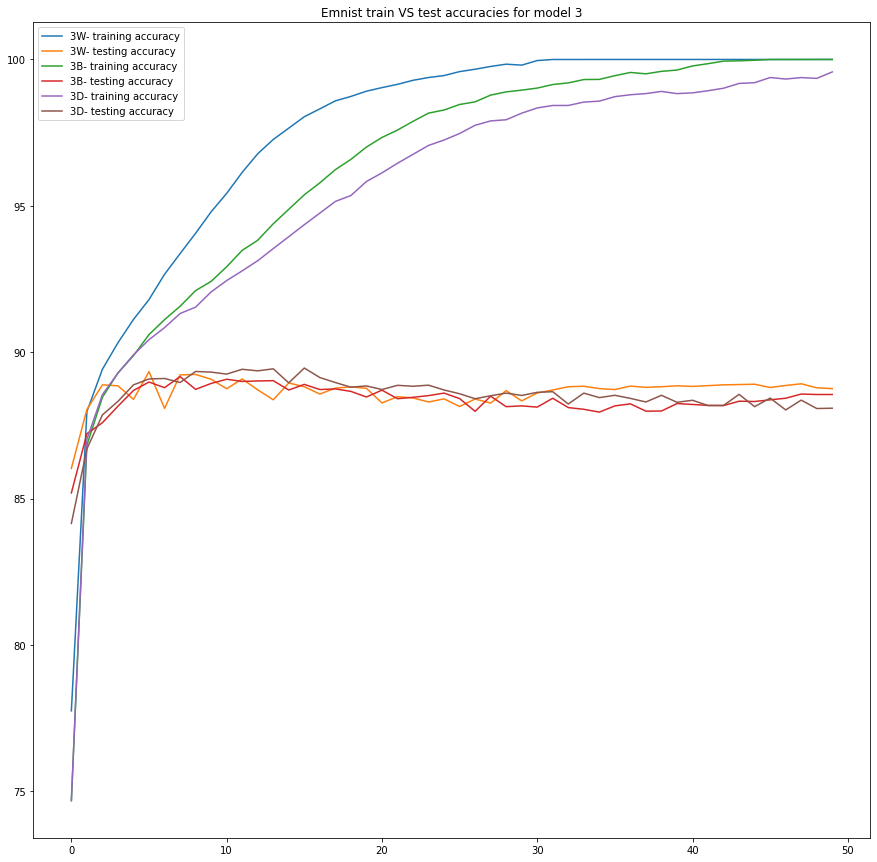

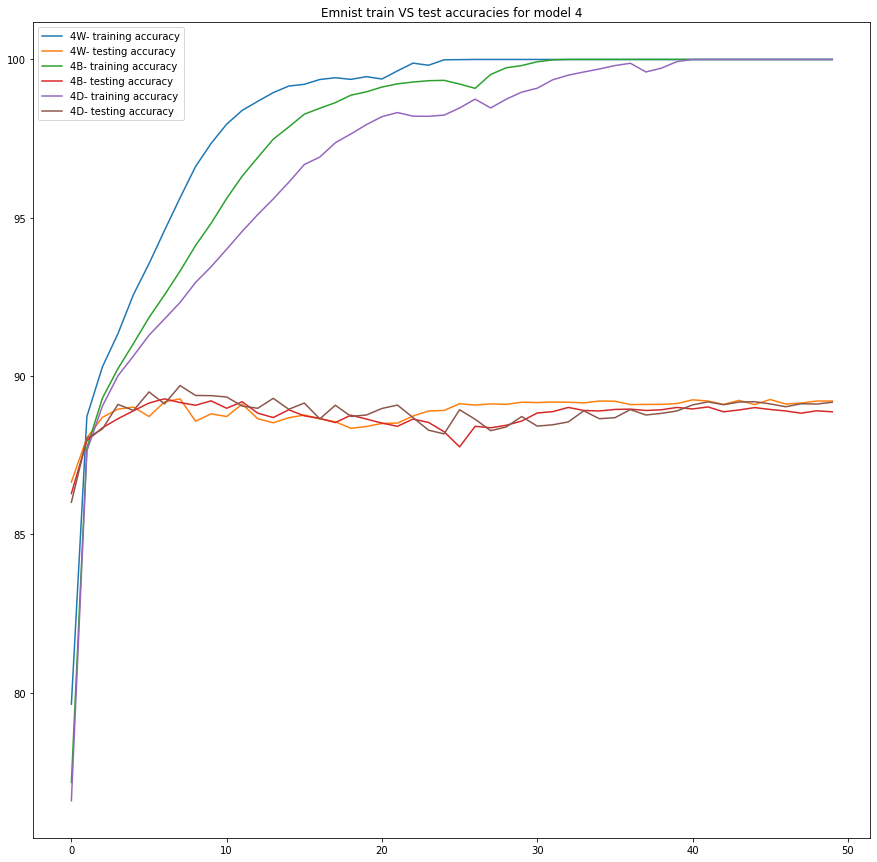

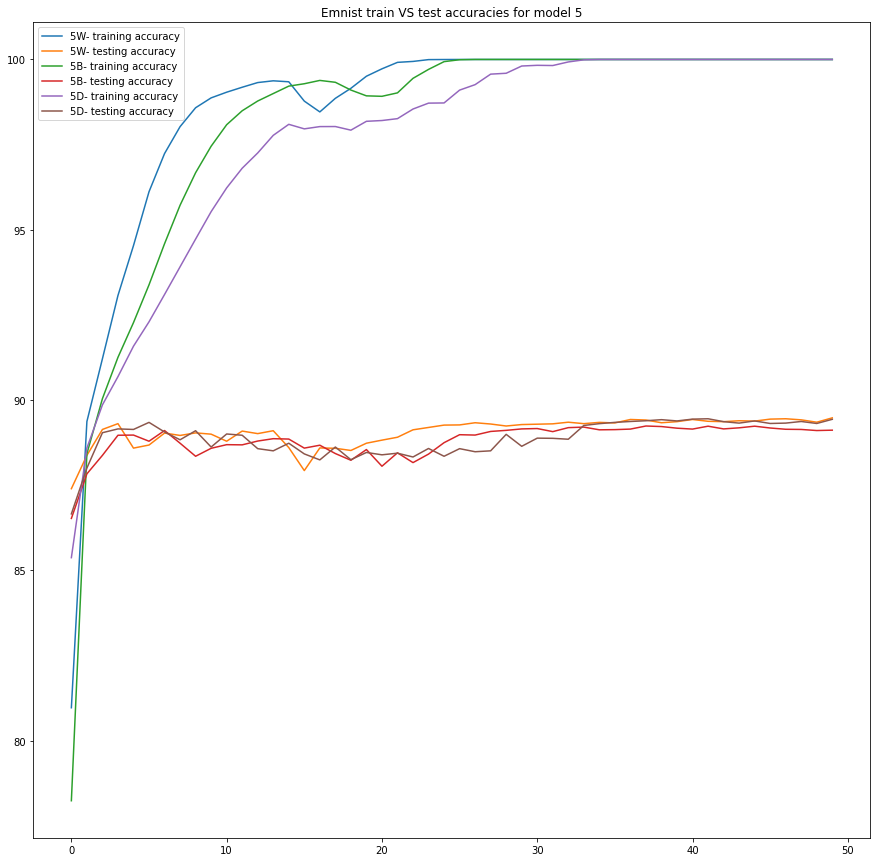

In [107]:
get_all_graphs_from_csv('net_results_Emnist_full.csv')

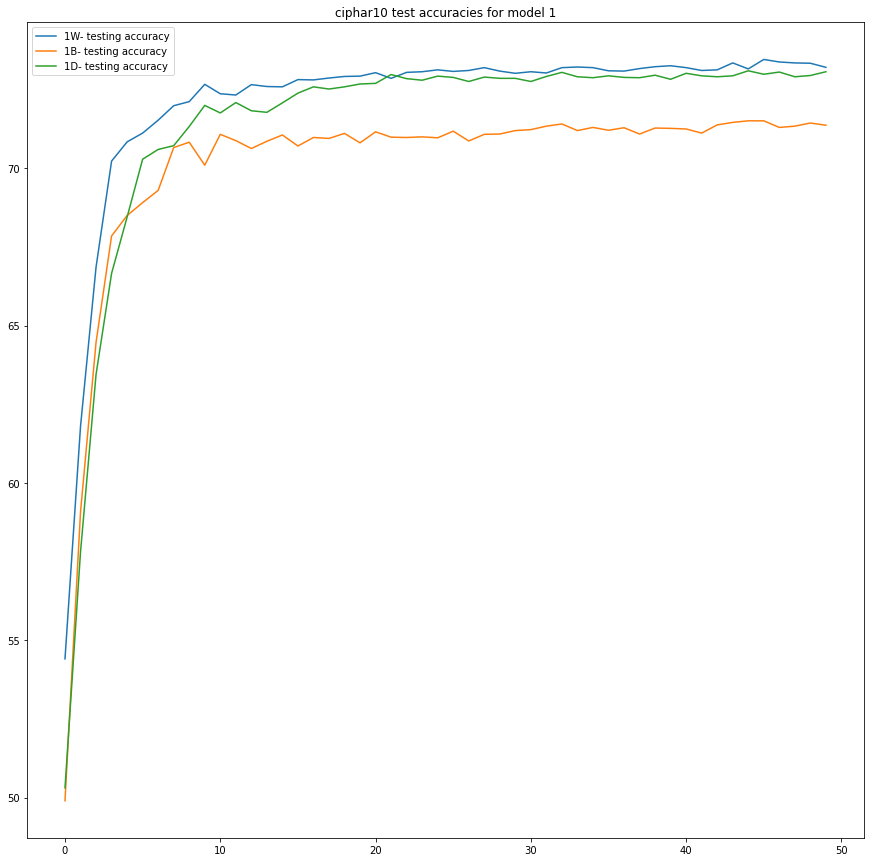

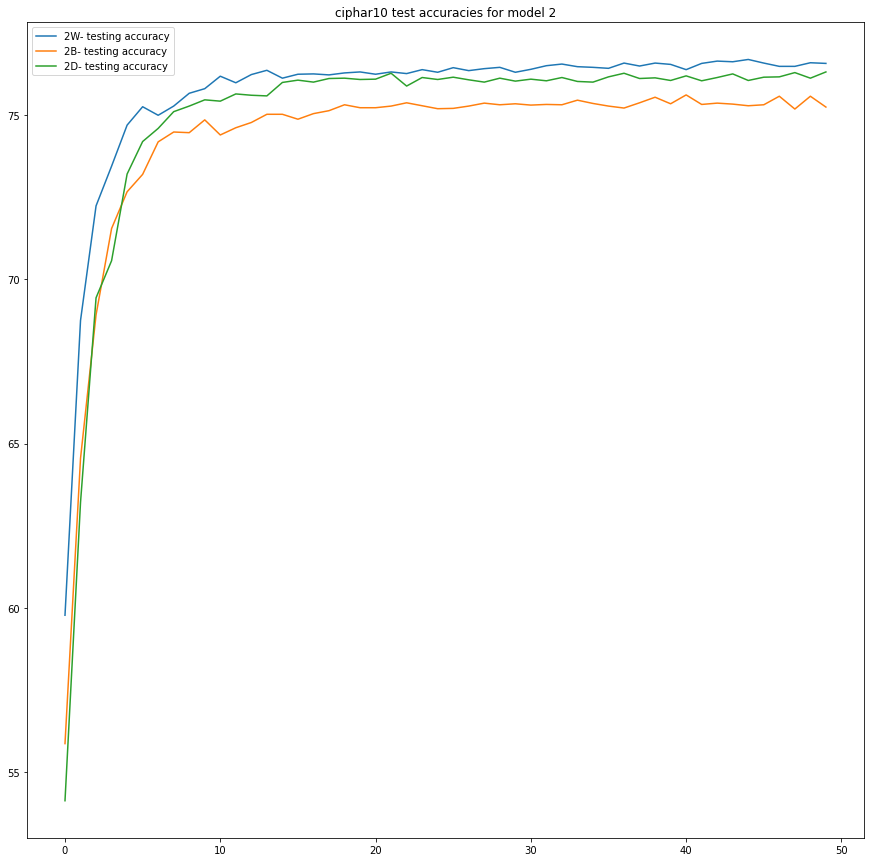

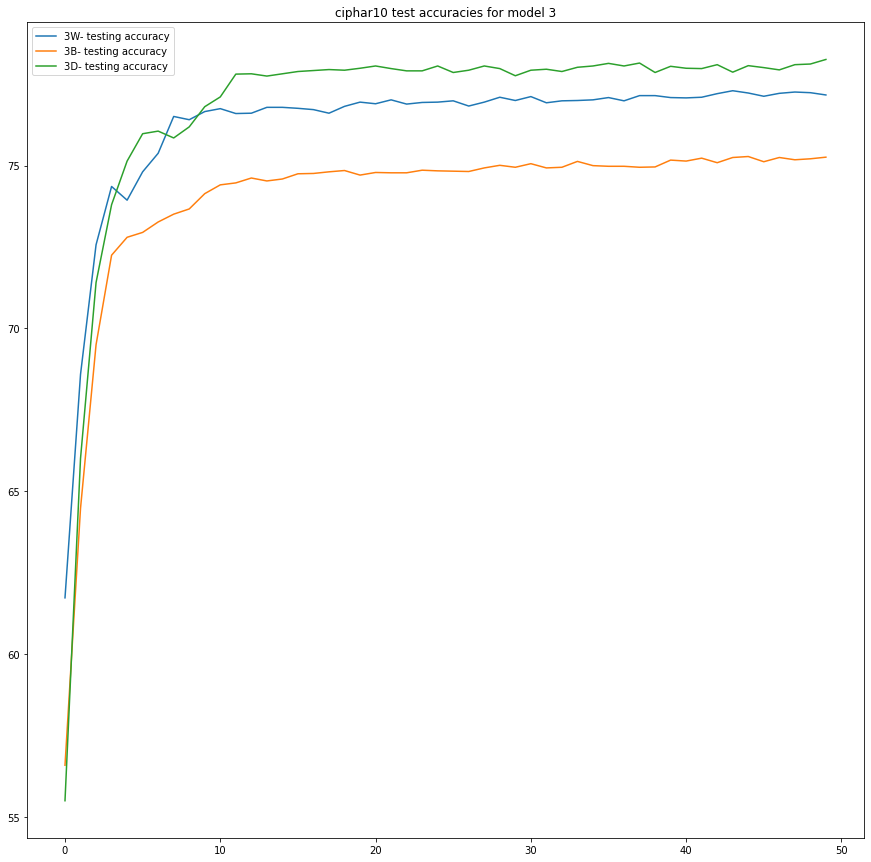

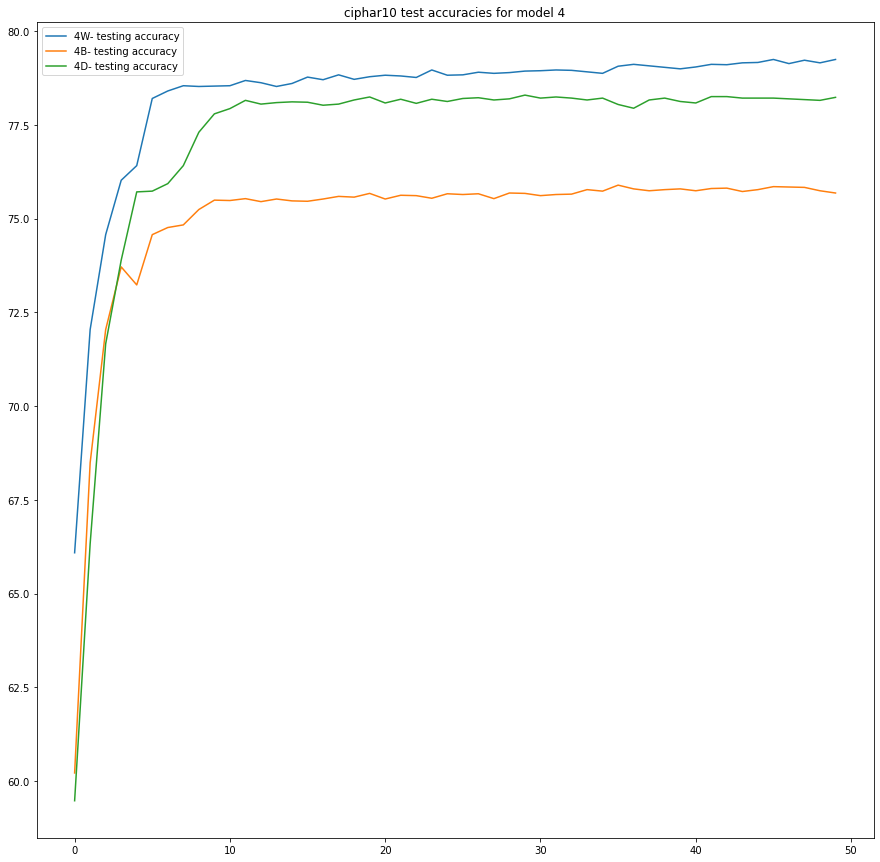

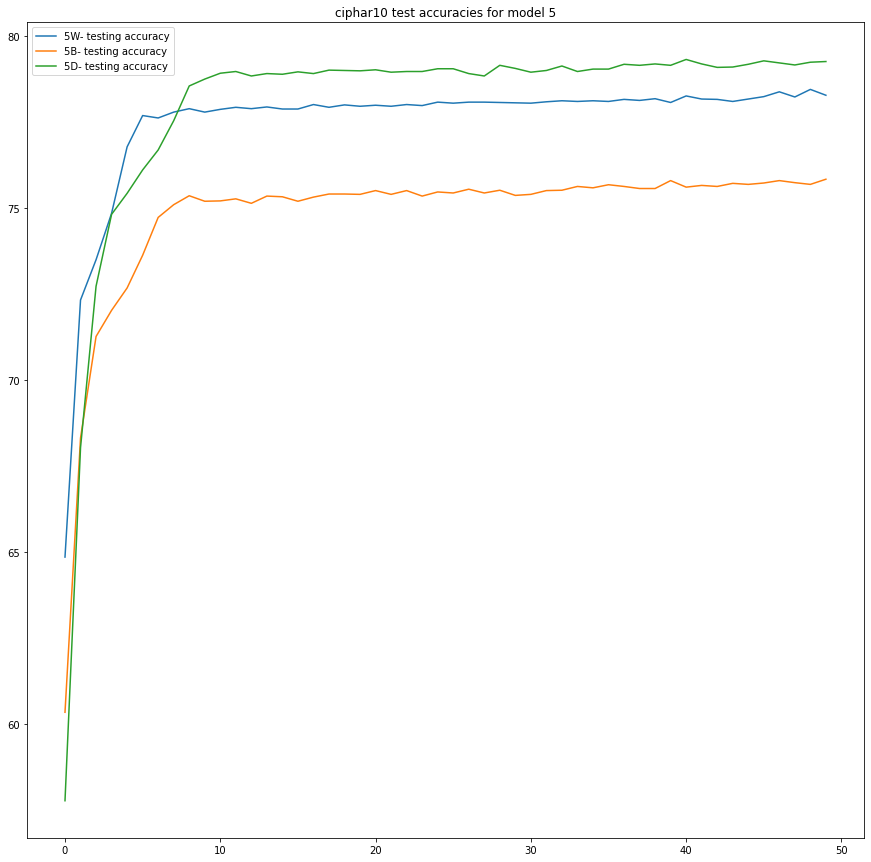

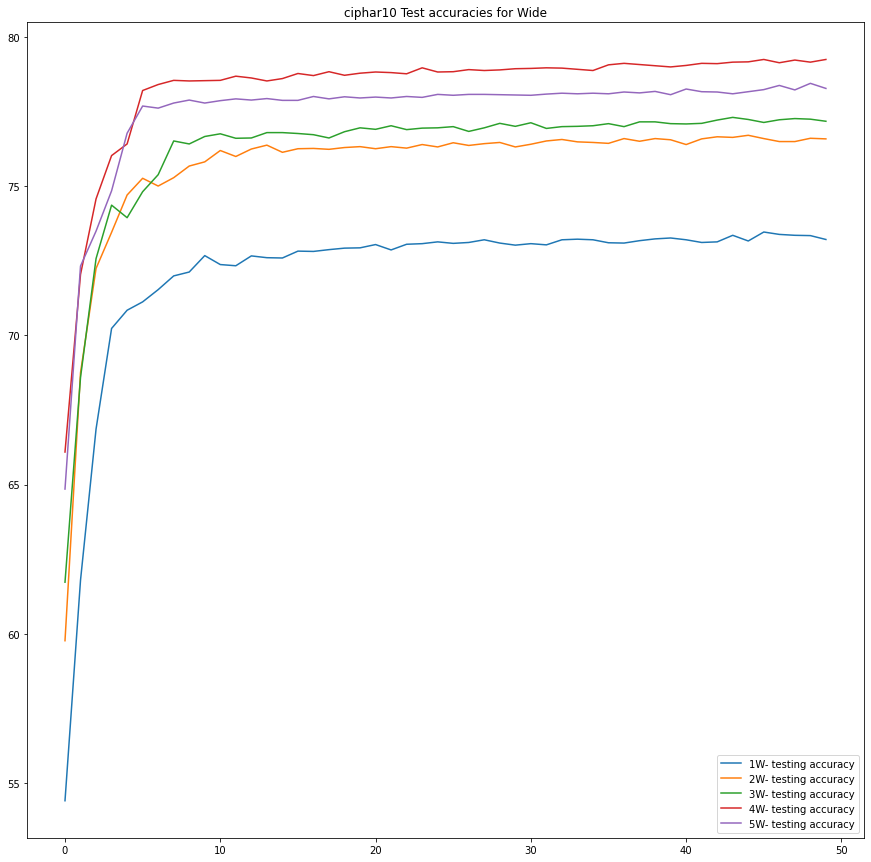

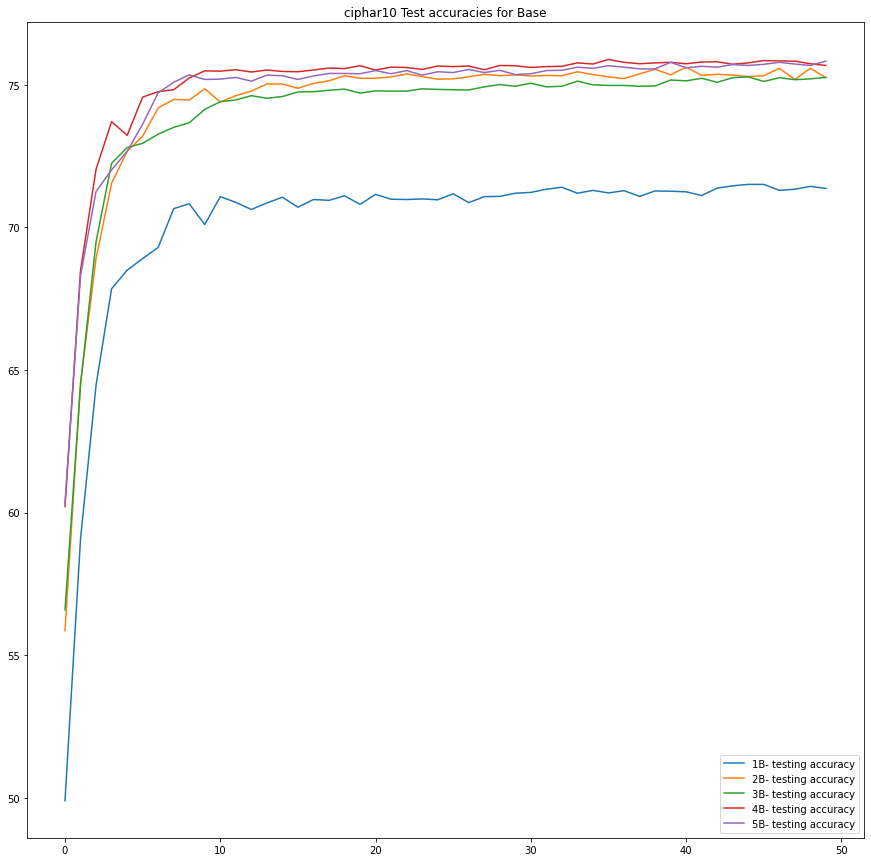

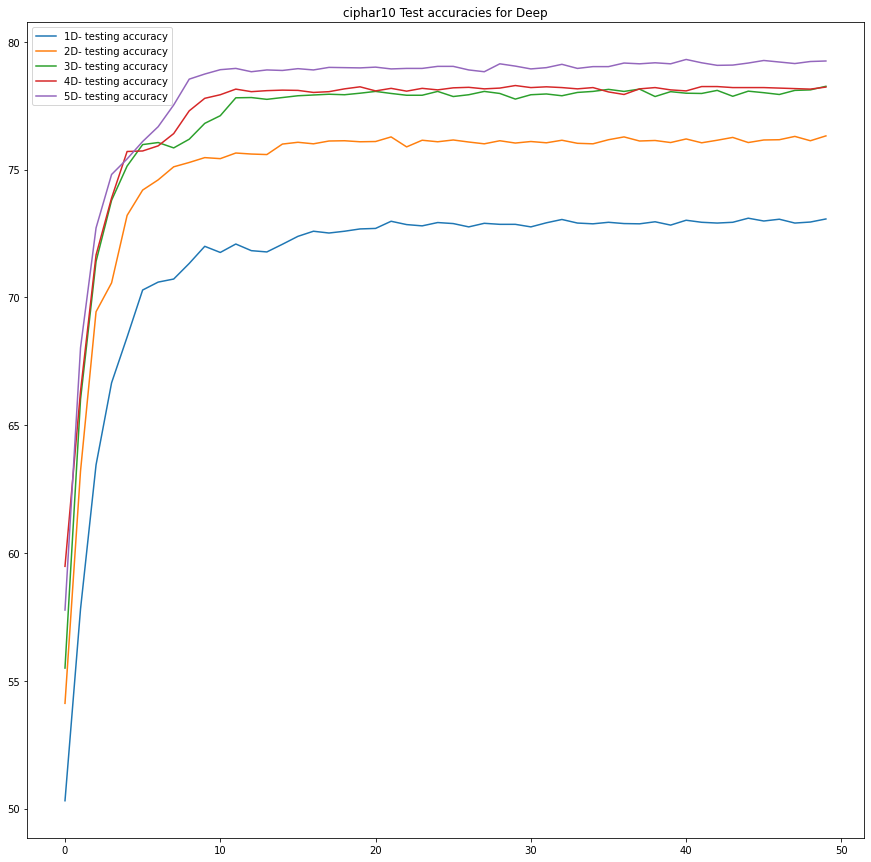

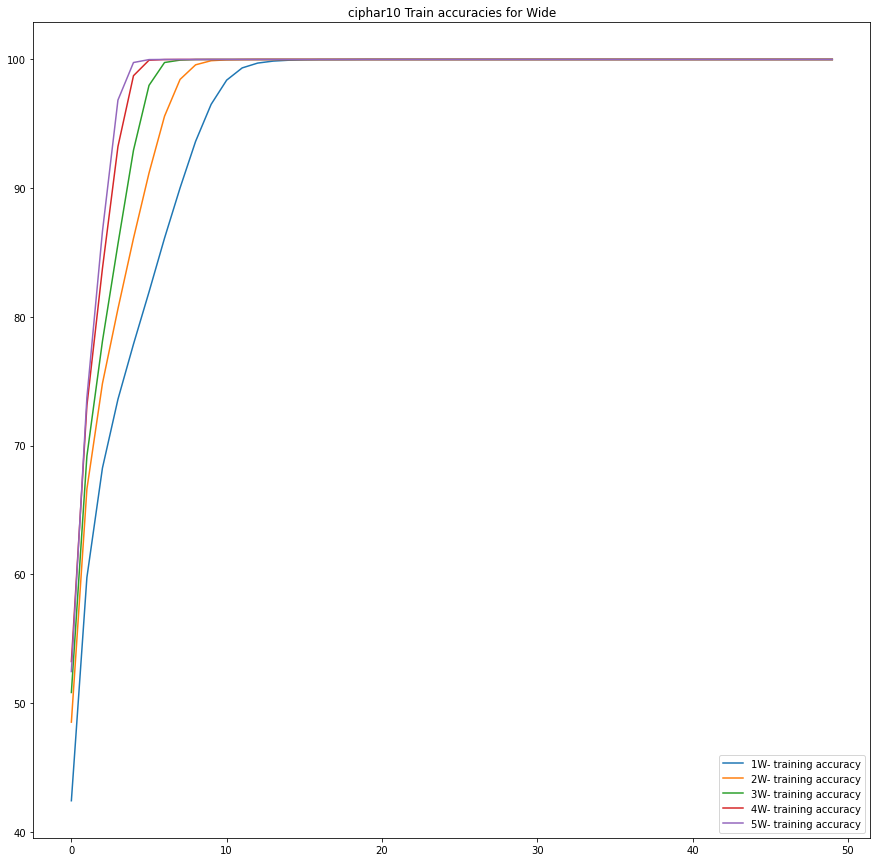

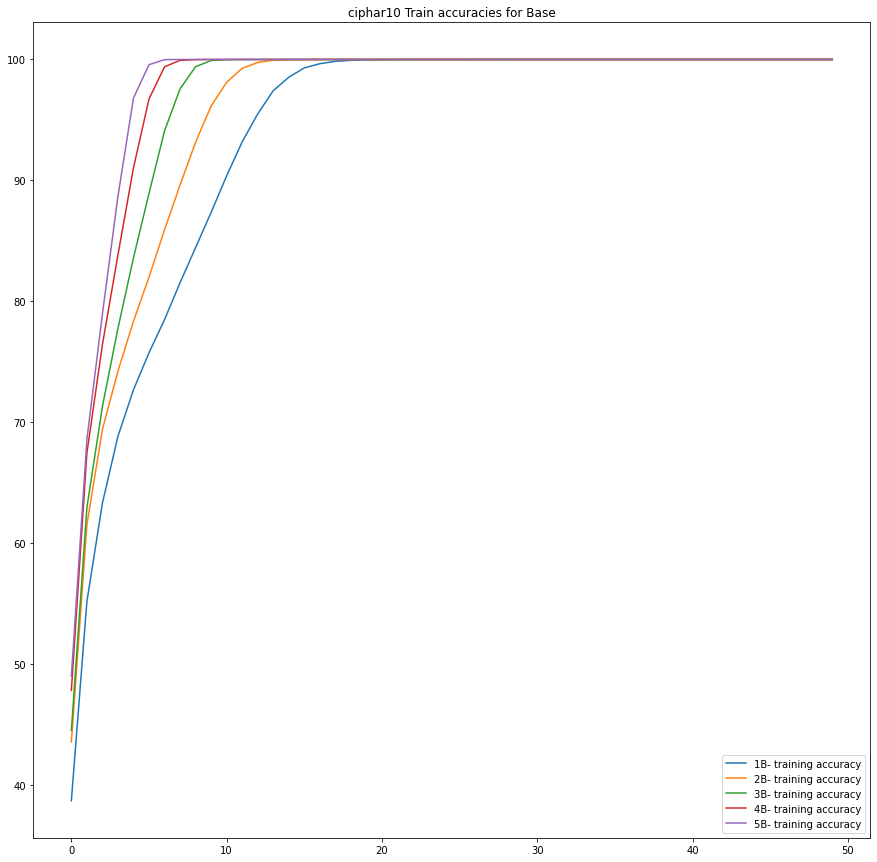

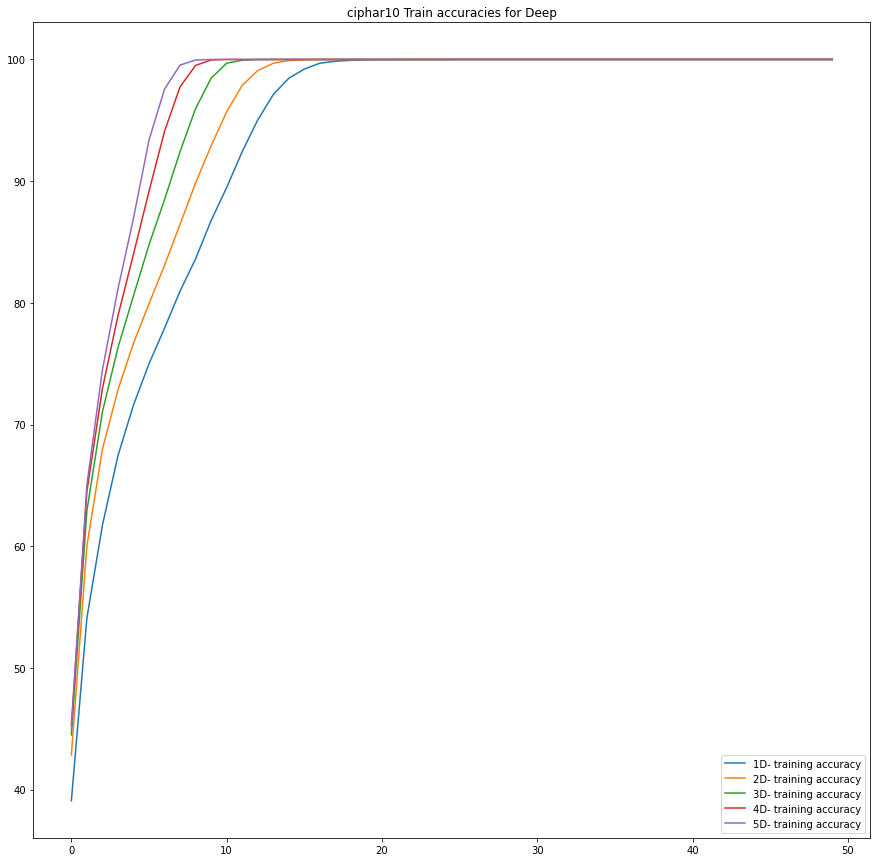

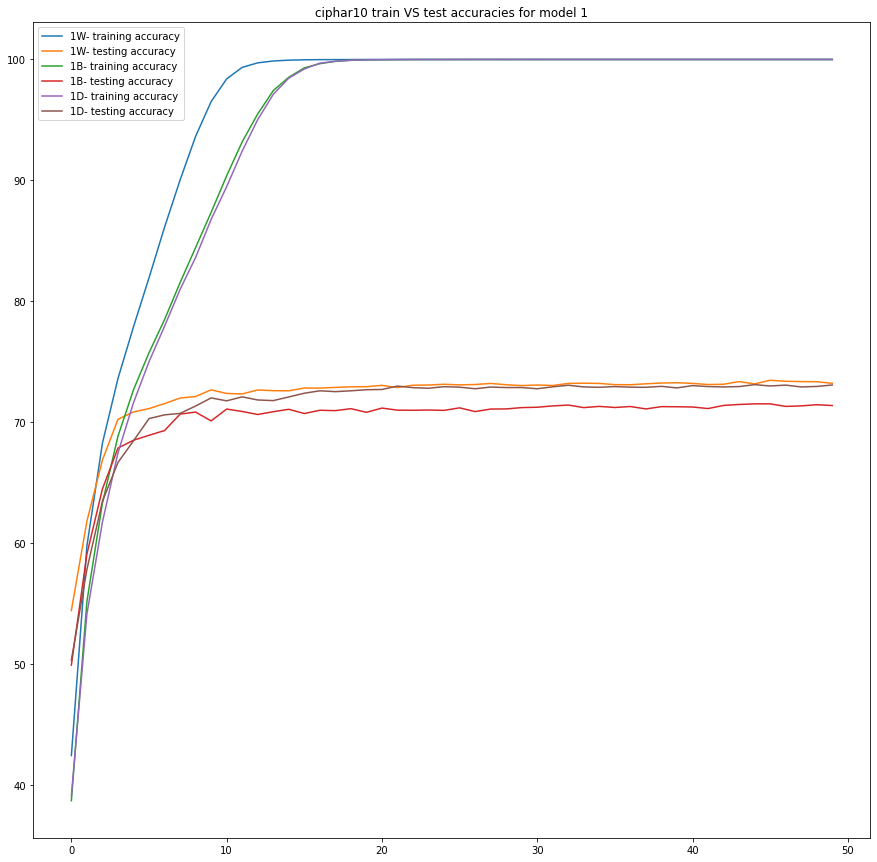

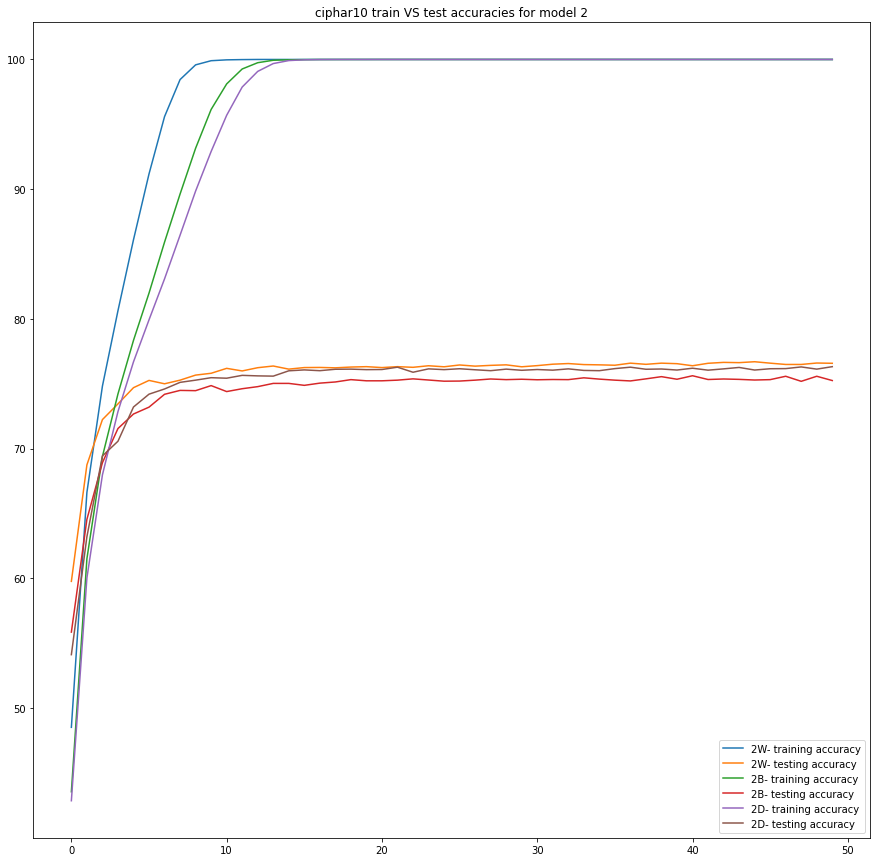

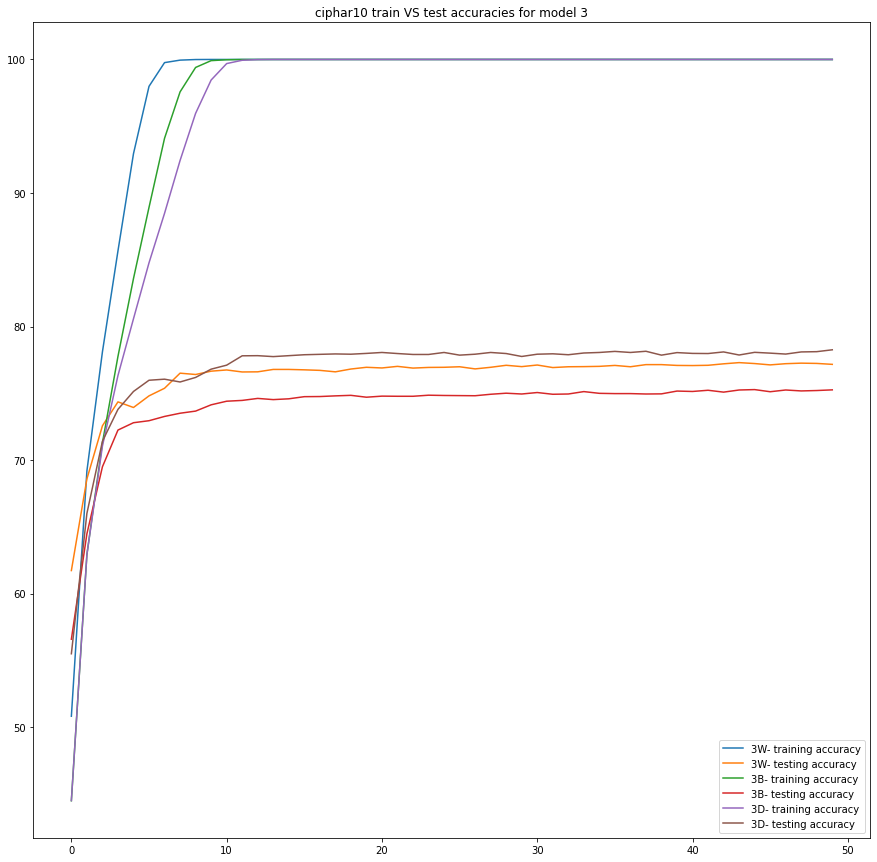

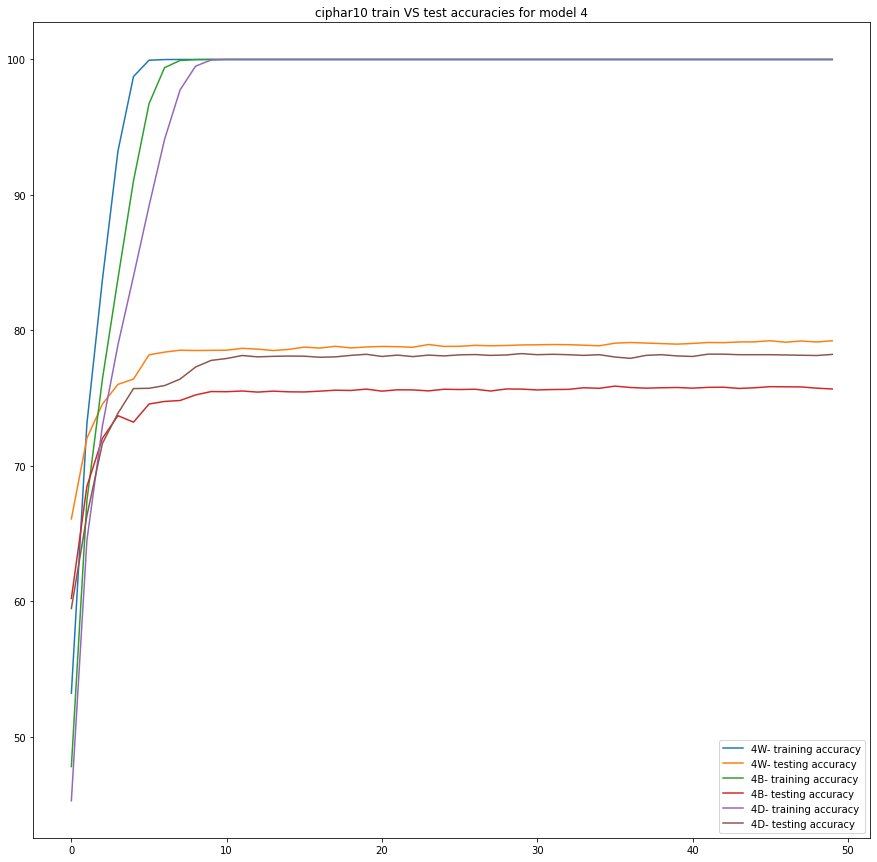

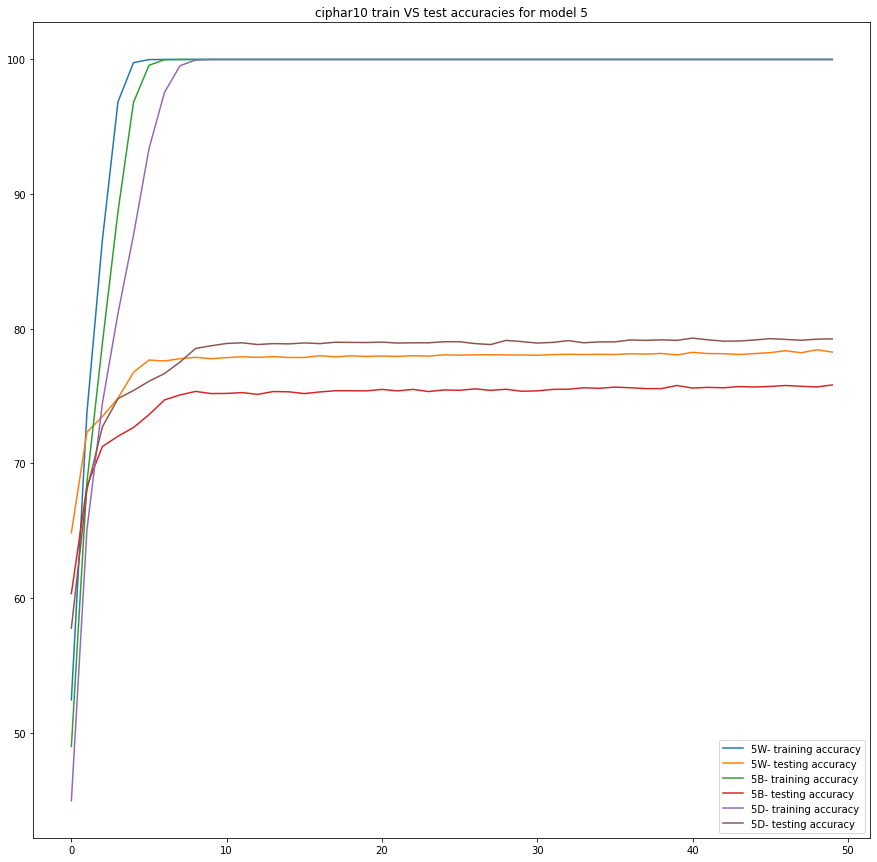

In [108]:
get_all_graphs_from_csv('net_results_ciphar10_full.csv')